In [530]:
# import the required packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


## 1. HR Analytics

### 1.1 Load and Sample the data

In [531]:
HRdata = pd.read_csv('HRdata3.csv')

In [532]:
HRdata.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Sales & Marketing,department_Operations,...,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16,is_promoted,training_performance,high_performer,weighted_sum,training_score_percentile
0,3,1,35,5.0,8,1,0,49,1,0,...,0,0,0,0,0,0,49,0,6.6,60
1,2,1,30,5.0,4,0,0,60,0,1,...,0,0,0,0,0,0,60,0,7.5,64
2,2,1,34,3.0,7,0,0,50,1,0,...,0,0,0,0,0,0,50,0,5.9,60
3,2,2,39,1.0,10,0,0,50,1,0,...,0,0,0,0,0,0,100,0,5.3,60
4,2,1,45,3.0,2,0,0,73,0,0,...,1,0,0,0,0,0,73,0,8.2,73


In [533]:
HRdata.tail()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Sales & Marketing,department_Operations,...,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16,is_promoted,training_performance,high_performer,weighted_sum,training_score_percentile
54803,2,1,48,3.0,17,0,0,78,0,0,...,0,0,0,0,0,0,78,0,8.7,78
54804,3,1,37,2.0,6,0,0,56,0,1,...,0,0,0,1,0,0,56,0,6.2,62
54805,2,1,27,5.0,3,1,0,79,0,0,...,0,0,0,0,0,0,79,0,9.6,79
54806,2,1,29,1.0,2,0,0,45,1,0,...,0,0,0,0,0,0,45,0,4.8,59
54807,2,1,27,1.0,5,0,0,49,0,0,...,0,0,0,0,0,0,49,0,5.2,60


In [534]:
HRdata_sample = HRdata.sample(n=1000)
HRdata_sample.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Sales & Marketing,department_Operations,...,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16,is_promoted,training_performance,high_performer,weighted_sum,training_score_percentile
9028,2,1,26,2.0,5,0,0,50,1,0,...,0,0,0,0,0,0,50,0,5.6,60
50775,1,1,26,3.0,4,0,0,73,0,0,...,0,0,0,0,0,0,73,0,8.2,73
31841,3,1,53,3.0,16,0,0,50,1,0,...,0,0,0,0,0,0,50,0,5.9,60
50634,2,1,31,4.0,5,1,0,62,0,1,...,0,0,1,0,0,1,62,0,7.6,66
8758,3,2,44,3.0,16,0,0,84,0,0,...,0,0,0,0,0,0,168,0,9.3,81


## Improving Dataset

In [535]:
HRdata.shape

(54808, 31)

In [536]:
# Split the HR data into train and test sets
from imblearn.over_sampling import SMOTE
train, test = train_test_split(HRdata, test_size=0.3, random_state=42)

# Downsample the 'not_promoted' subset
not_promoted_sampled = train[train['is_promoted'] == 0].sample(n=10000, random_state=42)

# Combine the downsampled 'not_promoted' subset with the 'promoted' subset
train_balanced = pd.concat([not_promoted_sampled, train[train['is_promoted'] == 1]])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(train_balanced.drop('is_promoted', axis=1), train_balanced['is_promoted'])

X_test = test.drop("is_promoted", axis=1)
y_test = test["is_promoted"]

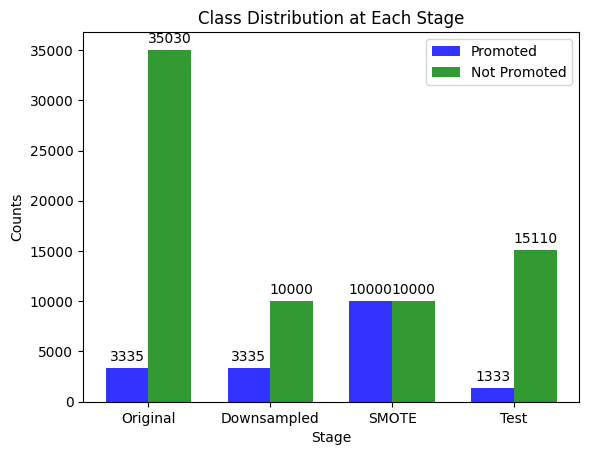

In [537]:
# Count instances in the original training set
import matplotlib.pyplot as plt
original_promoted_count = train['is_promoted'].sum()
original_not_promoted_count = len(train) - original_promoted_count

# Count instances after downsampling
downsampled_promoted_count = train_balanced['is_promoted'].sum()
downsampled_not_promoted_count = len(train_balanced) - downsampled_promoted_count

# Count instances after applying SMOTE
smote_promoted_count = y_train.sum()
smote_not_promoted_count = len(y_train) - smote_promoted_count

# Count instances in the test set
test_promoted_count = y_test.sum()
test_not_promoted_count = len(y_test) - test_promoted_count

# Data to plot
stages = ['Original', 'Downsampled', 'SMOTE', 'Test']
promoted_counts = [original_promoted_count, downsampled_promoted_count, smote_promoted_count, test_promoted_count]
not_promoted_counts = [original_not_promoted_count, downsampled_not_promoted_count, smote_not_promoted_count, test_not_promoted_count]

# Create bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

bar1 = ax.bar([x - bar_width/2 for x in range(len(stages))], promoted_counts, bar_width,
              alpha=opacity, color='b', label='Promoted')

bar2 = ax.bar([x + bar_width/2 for x in range(len(stages))], not_promoted_counts, bar_width,
              alpha=opacity, color='g', label='Not Promoted')

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

ax.set_xlabel('Stage')
ax.set_ylabel('Counts')
ax.set_title('Class Distribution at Each Stage')
ax.set_xticks(range(len(stages)))
ax.set_xticklabels(stages)
ax.legend()

plt.show()

In [538]:
# Features with High Correlation to target
target = 'is_promoted'
correlations = HRdata.corr()[target].abs()
high_corr_features = correlations[(correlations >= 0.2) & (correlations.index != target)].index.tolist()
print(high_corr_features)

# Conduct Polynomial Expansion
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly.fit(X_train[high_corr_features])

# Transform and convert to DataFrame with correct column names
X_train_high_corr_poly = pd.DataFrame(poly.transform(X_train[high_corr_features]),
                                         columns=poly.get_feature_names_out(high_corr_features),
                                         index=X_train.index)
X_test_high_corr_poly = pd.DataFrame(poly.transform(X_test[high_corr_features]),
                                        columns=poly.get_feature_names_out(high_corr_features),
                                        index=X_test.index)


X_train = pd.concat([X_train_high_corr_poly, X_train.drop(columns=high_corr_features)], axis=1)
X_test = pd.concat([X_test_high_corr_poly, X_test.drop(columns=high_corr_features)], axis=1)

['KPIs_met >80%', 'weighted_sum']


In [539]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### 1.2 Build the Model(s)

### Logistic Regression

In [540]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Decision Tree Classifier

In [541]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

### Random Forest Classifier

In [542]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

### Support Vector Machine

In [543]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

### XGBoost

In [544]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### MLP

In [545]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### 1.3 Evaluate and Improve the Model(s)

### Baseline Accuracy

In [546]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [547]:
# Evaluate Logistic Regression
# Evaluate Logistic Regression on the training set
y_pred_train_logreg = logreg.predict(X_train)
accuracy_train_logreg = accuracy_score(y_train, y_pred_train_logreg)
print("Logistic Regression Training Accuracy:", accuracy_train_logreg)

# Evaluate Logistic Regression on the testing set
y_pred_test_logreg = logreg.predict(X_test)
accuracy_test_logreg = accuracy_score(y_test, y_pred_test_logreg)
print("Logistic Regression Testing Accuracy:", accuracy_test_logreg)


Logistic Regression Training Accuracy: 0.8247
Logistic Regression Testing Accuracy: 0.8106185002736727


In [548]:
# Evaluate Decision Tree
# Evaluate Decision Tree on the training set
y_pred_train_dt = dt.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
print("Decision Tree Training Accuracy:", accuracy_train_dt)

# Evaluate Decision Tree on the testing set
y_pred_test_dt = dt.predict(X_test)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
print("Decision Tree Testing Accuracy:", accuracy_test_dt)



Decision Tree Training Accuracy: 0.99925
Decision Tree Testing Accuracy: 0.8211396947029131


In [549]:
# Evaluate Random Forest
# Evaluate Random Forest on the training set
y_pred_train_rf = rf.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print("Random Forest Training Accuracy:", accuracy_train_rf)

# Evaluate Random Forest on the testing set
y_pred_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Random Forest Testing Accuracy:", accuracy_test_rf)


Random Forest Training Accuracy: 0.99925
Random Forest Testing Accuracy: 0.8534330718238764


In [550]:
# Evaluate SVM
# Evaluate Support Vector Machine on the training set
y_pred_train_svm = svm.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
print("Support Vector Machine Training Accuracy:", accuracy_train_svm)

# Evaluate Support Vector Machine on the testing set
y_pred_test_svm = svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Support Vector Machine Testing Accuracy:", accuracy_test_svm)


Support Vector Machine Training Accuracy: 0.85565
Support Vector Machine Testing Accuracy: 0.8154229763425166


In [551]:
# For XGBoost
# Evaluate XGBoost Classifier on the training set
y_pred_train_xgb = xgb_clf.predict(X_train)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
print("XGBoost Classifier Training Accuracy:", accuracy_train_xgb)

# Evaluate XGBoost Classifier on the testing set
y_pred_test_xgb = xgb_clf.predict(X_test)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print("XGBoost Classifier Testing Accuracy:", accuracy_test_xgb)



XGBoost Classifier Training Accuracy: 0.9341
XGBoost Classifier Testing Accuracy: 0.8500881834215167


In [552]:
# For MLP
# Evaluate MLP Classifier on the training set
y_pred_train_mlp = mlp.predict(X_train)
accuracy_train_mlp = accuracy_score(y_train, y_pred_train_mlp)
print("MLP Classifier Training Accuracy:", accuracy_train_mlp)

# Evaluate MLP Classifier on the testing set
y_pred_test_mlp = mlp.predict(X_test)
accuracy_test_mlp = accuracy_score(y_test, y_pred_test_mlp)
print("MLP Classifier Testing Accuracy:", accuracy_test_mlp)



MLP Classifier Training Accuracy: 0.9053
MLP Classifier Testing Accuracy: 0.8270996776743903


### Hyperparameters finetuning

### Improving Decision Tree

Decision Tree Hyperparameters:

- max_depth: Maximum depth of the tree.

- min_samples_split: Minimum number of samples required to split an internal node.

- min_samples_leaf: Minimum number of samples required to be at a leaf node.

- criterion: The function to measure the quality of a split (e.g., 'gini' for the Gini impurity and 'entropy' for the information gain).

- max_features: The number of features to consider when looking for the best split. It can be an integer (number of features), a float (fraction of features), "auto", "sqrt", "log2", or None

- max_leaf_nodes: The maximum number of leaf nodes a tree can have. If None, then unlimited number of leaf nodes.

BAseline
- Decision Tree Training Accuracy: 0.9995409334353481
- Decision Tree Testing Accuracy: 0.7575865762227776        

### DT model 2 : Adjusting Leaves

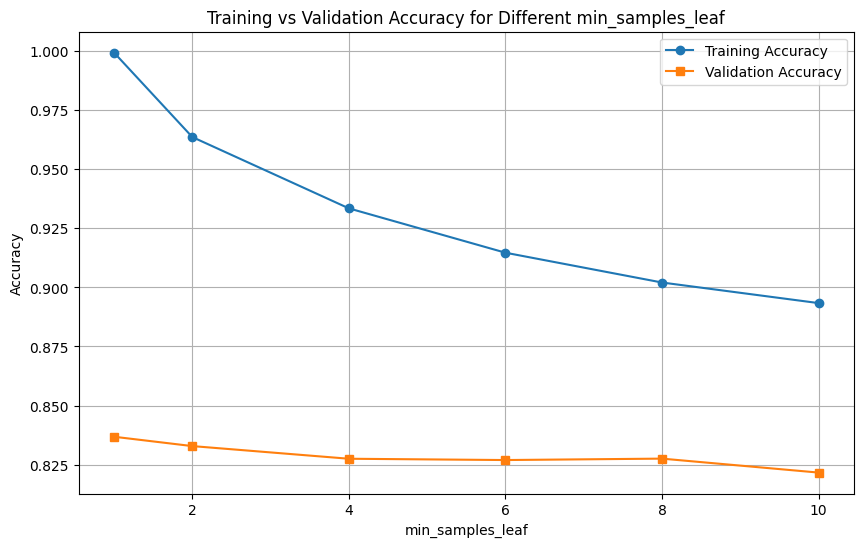

In [553]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# List of values to try for min_samples_leaf
min_samples_leaf_values = [1, 2, 4, 6, 8, 10]

# Store the accuracy scores
train_accuracies = []
validate_accuracies = []

# Loop over the different values for min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    # Create and fit the model with the current min_samples_leaf
    dt = DecisionTreeClassifier( min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    # Evaluate on training set
    train_accuracy = dt.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Perform cross-validation
    val_score = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    validate_accuracies.append(np.mean(val_score))



# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_leaf_values, validate_accuracies, label='Validation Accuracy', marker='s')
plt.title('Training vs Validation Accuracy for Different min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [554]:
dt_refined2  = DecisionTreeClassifier(min_samples_leaf = 9)
dt_refined2.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = dt_refined2.predict(X_train)
y_pred_test = dt_refined2.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8972
Test Accuracy: 0.8243


### DT model 3 - Adjusting depth

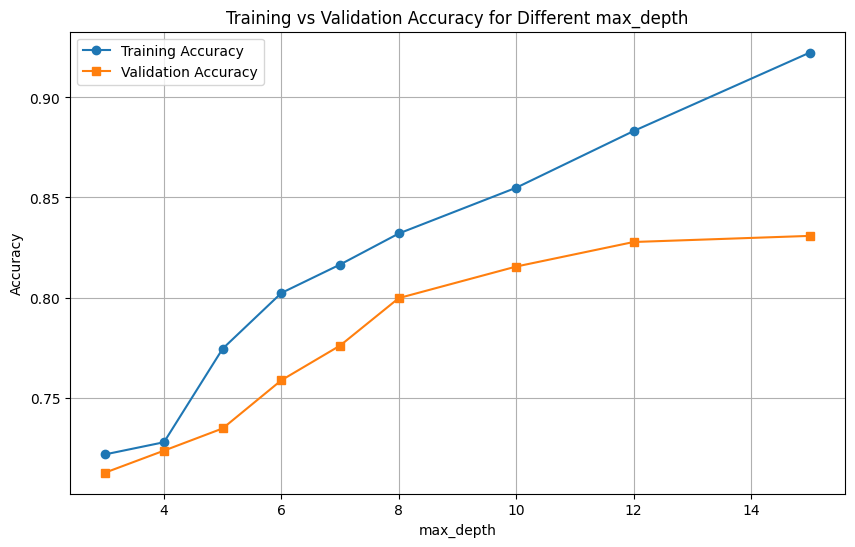

In [555]:

# List of values to try for max_depth
max_depth_values = [3, 4, 5, 6, 7, 8, 10, 12, 15]

# Store the accuracy scores
train_accuracies = []
validate_accuracies = []

# Loop over the different values for max_depth
for max_depth in max_depth_values:
    # Create and fit the model with the current max_depth
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    # Evaluate on training set
    train_accuracy = dt.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Perform cross-validation
    val_score = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    validate_accuracies.append(np.mean(val_score))



# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, validate_accuracies, label='Validation Accuracy', marker='s')
plt.title('Training vs Validation Accuracy for Different max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [556]:
dt_refined3  = DecisionTreeClassifier(min_samples_leaf = 9, max_depth = 10)
dt_refined3.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = dt_refined3.predict(X_train)
y_pred_test = dt_refined3.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8471
Test Accuracy: 0.7526


### DT model 4 - Min Sample Split

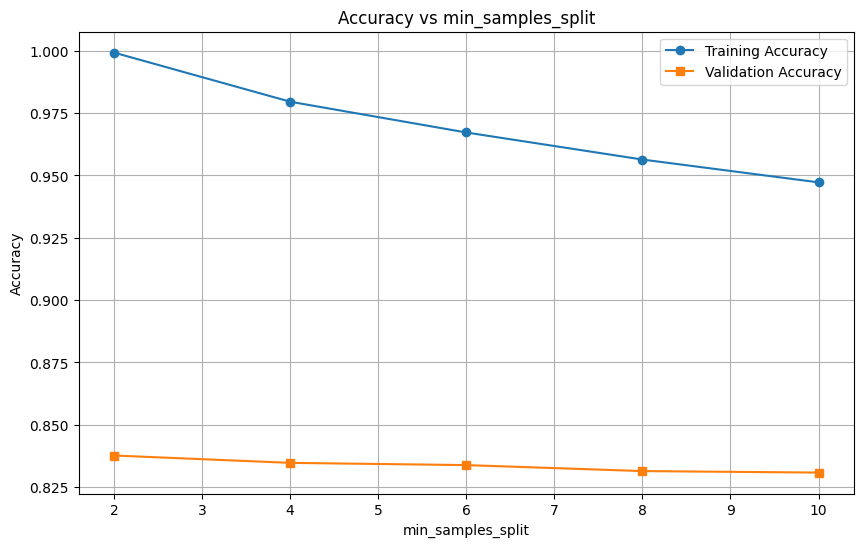

In [557]:
# List of values to try for min_samples_split
min_samples_split_values = [2, 4, 6, 8, 10]

# Store the accuracy scores
train_accuracies = []
validate_accuracies = []


# Loop over the different values for min_samples_split
for min_samples_split in min_samples_split_values:
    # Create and fit the model with the current min_samples_split
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)

    # Training accuracy
    train_accuracy = dt.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Validation accuracy
    val_score = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    validate_accuracies.append(np.mean(val_score))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_split_values, validate_accuracies, label='Validation Accuracy', marker='s')
plt.title('Accuracy vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [558]:
dt_refined4  = DecisionTreeClassifier(min_samples_leaf = 9, max_depth = 10,min_samples_split= 10)
dt_refined4.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = dt_refined4.predict(X_train)
y_pred_test = dt_refined4.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8471
Test Accuracy: 0.7524


### DT model 5 - Random Search

In [559]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Define the parameter grid to sample from during Random Search
param_dist = {
    'criterion': ['gini', 'entropy'],  # Criteria for splitting
    'max_leaf_nodes': randint(10, 1000),  # Range for the max number of leaf nodes
    'max_features': ['auto', 'sqrt', 'log2', None] + list(range(1, X_train.shape[1] + 1))  # 'auto', 'sqrt', 'log2', None, and integer values up to the number of features
}

# Instantiate a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use accuracy as the scoring metric, adjust as necessary
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV instance to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'gini', 'max_features': 29, 'max_leaf_nodes': 945}
Best Score: 0.83895


In [560]:
dt_refined_final  = DecisionTreeClassifier(min_samples_leaf = 9, max_depth = 10,min_samples_split= 10,
                                     criterion= 'gini', max_features= 27, max_leaf_nodes= 999, random_state = 42 )
dt_refined_final.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = dt_refined4.predict(X_train)
y_pred_test = dt_refined4.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8471
Test Accuracy: 0.7524


### Improving Random Forest

 key Random Forest hyperparameters:

1. **n_estimators**
2. **max_depth**
3. **min_samples_split**
4. **min_samples_leaf**
5. **max_features**
6. **bootstrap**
7. **criterion**
8. **max_leaf_nodes**
9. **min_impurity_decrease**


Base Line Accuracy :
- Random Forest Training Accuracy: 0.9993
- Random Forest Testing Accuracy: 0.8522775649212431

### RF model 2 - Finetuning n estimators

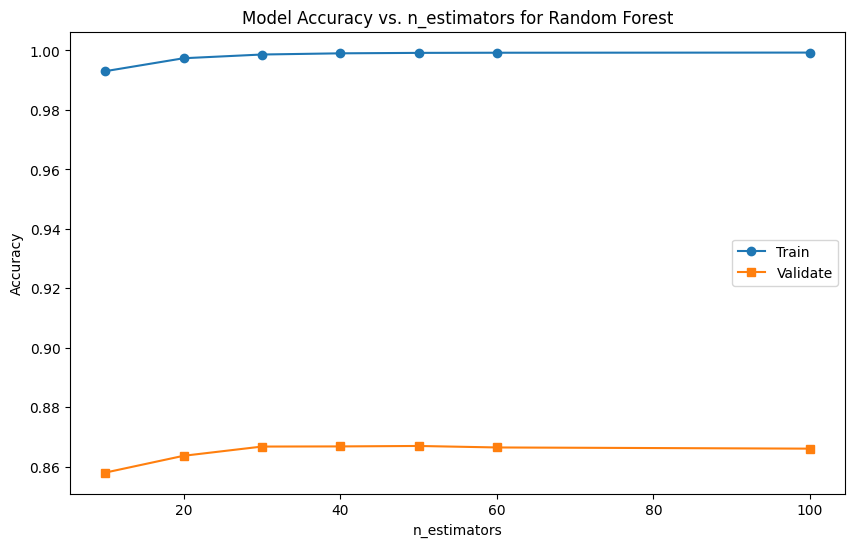

In [561]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define a range of n_estimators values to test
n_estimators_values = [10,20,30,40,50,60, 100]
train_scores, validate_scores = [], []

# Assume X_train, X_test, y_train, y_test are already defined
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    # Train the model
    rf_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Plot the scores against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train', marker='o')
plt.plot(n_estimators_values, validate_scores, label='Validate', marker='s')
plt.title('Model Accuracy vs. n_estimators for Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [562]:
rf_refined2  = RandomForestClassifier(n_estimators = 20)
rf_refined2.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = rf_refined2.predict(X_train)
y_pred_test = rf_refined2.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9983
Test Accuracy: 0.8554


### RF model 3 - max_features

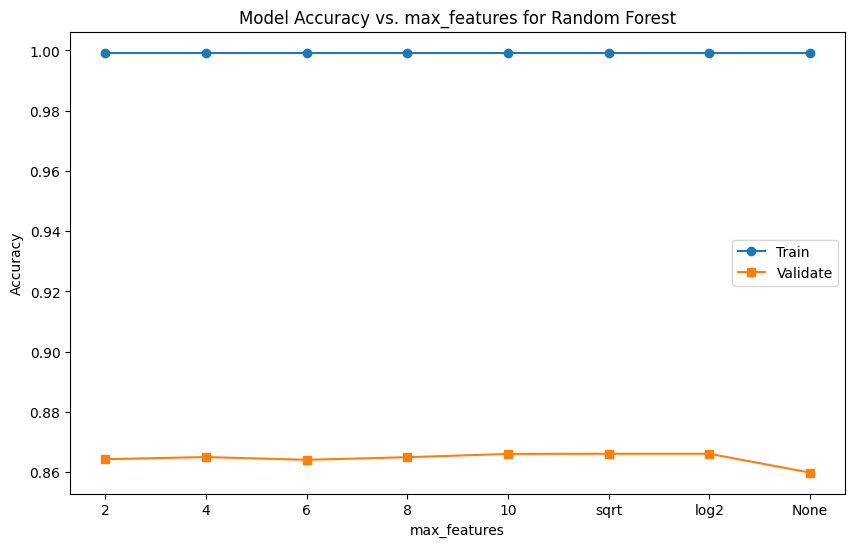

In [563]:

max_features_values = [2, 4, 6, 8, 10, 'sqrt', 'log2', None]
train_scores, validate_scores = [], []

# Assume X_train, X_test, y_train, y_test are already defined
for max_features in max_features_values:
    rf_model = RandomForestClassifier( max_features=max_features, random_state=42)
    # Train the model
    rf_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Convert max_features_values to string for plotting when using 'sqrt' and 'log2'
max_features_labels = [str(mf) for mf in max_features_values]

# Plot the scores against max_features values
plt.figure(figsize=(10, 6))
plt.plot(max_features_labels, train_scores, label='Train', marker='o')
plt.plot(max_features_labels, validate_scores, label='Validate', marker='s')
plt.title('Model Accuracy vs. max_features for Random Forest')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [564]:
rf_refined3  = RandomForestClassifier(n_estimators = 20, max_features = 6)
rf_refined3.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = rf_refined3.predict(X_train)
y_pred_test = rf_refined3.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9982
Test Accuracy: 0.8529


### RF model 4 - finetuning max_depth

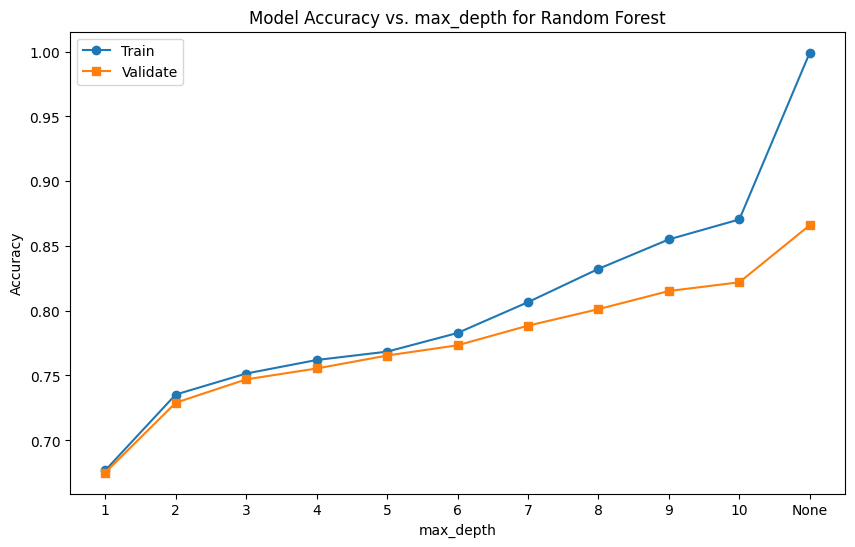

In [565]:

# Define a range of max_depth values to test
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
train_scores, validate_scores =  [], []

# Loop over the max_depth values and calculate training, validation, and testing scores
for max_depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    # Train the model
    rf_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Convert max_depth_values to string for plotting when using None
max_depth_labels = [str(md) if md is not None else 'None' for md in max_depth_values]

# Plot the scores against max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_labels, train_scores, label='Train', marker='o')
plt.plot(max_depth_labels, validate_scores, label='Validate', marker='s')
plt.title('Model Accuracy vs. max_depth for Random Forest')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [566]:
rf_refined4  = RandomForestClassifier(n_estimators = 20, max_features = 6,max_depth =10)
rf_refined4.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = rf_refined4.predict(X_train)
y_pred_test = rf_refined4.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8784
Test Accuracy: 0.7657


### RF Model 5 - finetuning min sample split

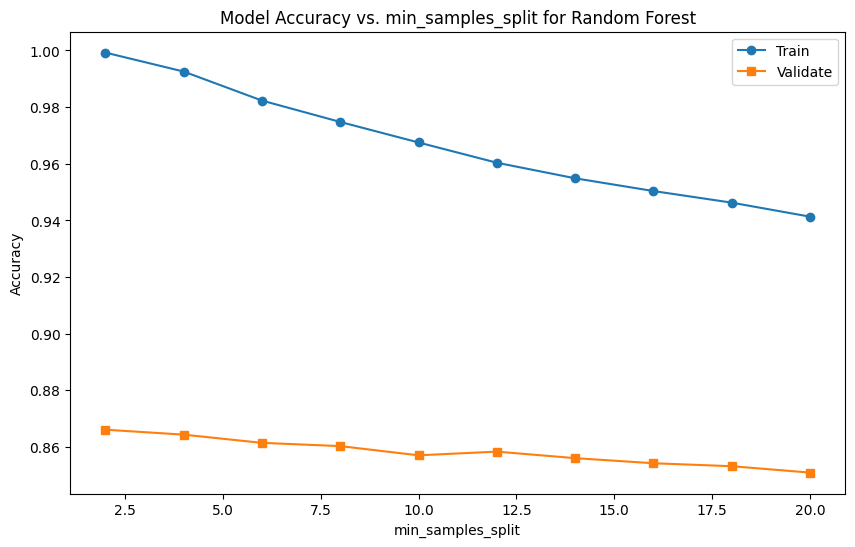

In [567]:
# Define a range of min_samples_split values to test
min_samples_split_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
train_scores, validate_scores= [], []

# Loop over the min_samples_split values and calculate training, validation, and testing scores
for min_samples_split in min_samples_split_values:
    rf_model = RandomForestClassifier( min_samples_split=min_samples_split, random_state=42)
    # Train the model
    rf_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Plot the scores against min_samples_split values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_scores, label='Train', marker='o')
plt.plot(min_samples_split_values, validate_scores, label='Validate', marker='s')
plt.title('Model Accuracy vs. min_samples_split for Random Forest')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [568]:
rf_refined5  = RandomForestClassifier(n_estimators = 20, max_features = 6,max_depth =10,min_samples_split = 20)
rf_refined5.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = rf_refined5.predict(X_train)
y_pred_test = rf_refined5.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8626
Test Accuracy: 0.7602


### RF model 6 - Finetuning min samples leaf

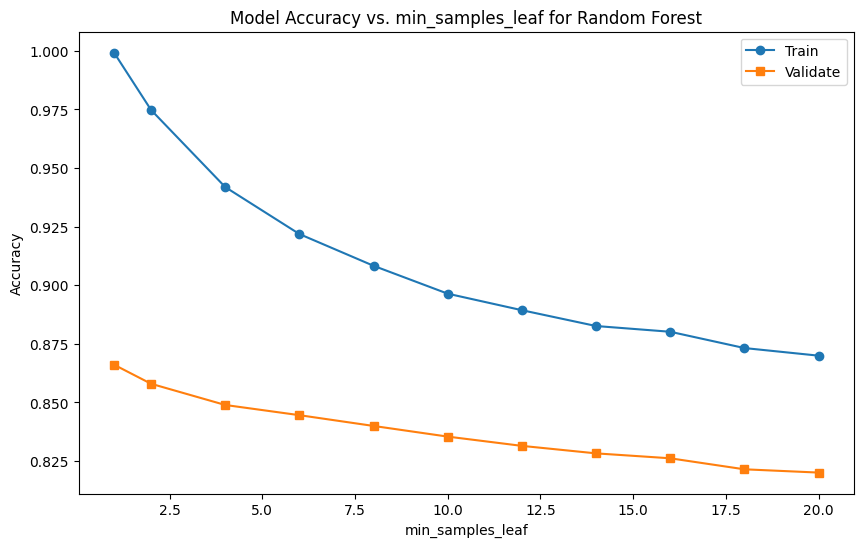

In [569]:
# Define a range of min_samples_leaf values to test
min_samples_leaf_values = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
train_scores, validate_scores = [], []

# Loop over the min_samples_leaf values and calculate training, validation, and testing scores
for min_samples_leaf in min_samples_leaf_values:
    rf_model = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    # Train the model
    rf_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))

# Plot the scores against min_samples_leaf values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_scores, label='Train', marker='o')
plt.plot(min_samples_leaf_values, validate_scores, label='Validate', marker='s')
plt.title('Model Accuracy vs. min_samples_leaf for Random Forest')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [570]:
rf_refined6  = RandomForestClassifier(n_estimators = 20, max_features = 6,max_depth =10,min_samples_split = 20,min_samples_leaf = 10)
rf_refined6.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = rf_refined6.predict(X_train)
y_pred_test = rf_refined6.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8531
Test Accuracy: 0.7504


### RF model 7 - Random search

In [571]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution to sample from during Random Search
param_dist = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None] + list(range(10, 51)),  # Extending range for random sampling
    'min_impurity_decrease': uniform(0.0, 0.1),  # Using uniform distribution from 0.0 to 0.1

}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and scores
best_params = random_search.best_params_
best_score = random_search.best_score_
best_estimator = random_search.best_estimator_

# Evaluate the best model found by RandomizedSearchCV on the test set
best_test_score = best_estimator.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Training Score:", best_score)
print("Best Test Score:", best_test_score)



Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_leaf_nodes': 33, 'min_impurity_decrease': 0.0005061583846218687}
Best Training Score: 0.7887
Best Test Score: 0.6902633339414949


In [572]:
rf_refined_final  = RandomForestClassifier(n_estimators = 20, max_features = 6,max_depth =10,min_samples_split = 20,
                                      min_samples_leaf = 10,bootstrap= False,criterion= 'entropy', max_leaf_nodes=39,
                                      min_impurity_decrease= 0.02,random_state=42)
rf_refined_final.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = rf_refined_final.predict(X_train)
y_pred_test = rf_refined_final.predict(X_test)

# Calculate the accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7375
Test Accuracy: 0.6720


### Improving XGB

XGB hyperparameters
- max_depth
- min_child_weight
- gamma (min_split_loss)
- subsample
- colsample_bytree
- eta (learning_rate)
- n_estimators

XGB baseline model :
- XGBoost Classifier Training Accuracy: 0.9654169854628921
- XGBoost Classifier Testing Accuracy: 0.7950731881470903


### XGB Model 2 : finetuning max depth

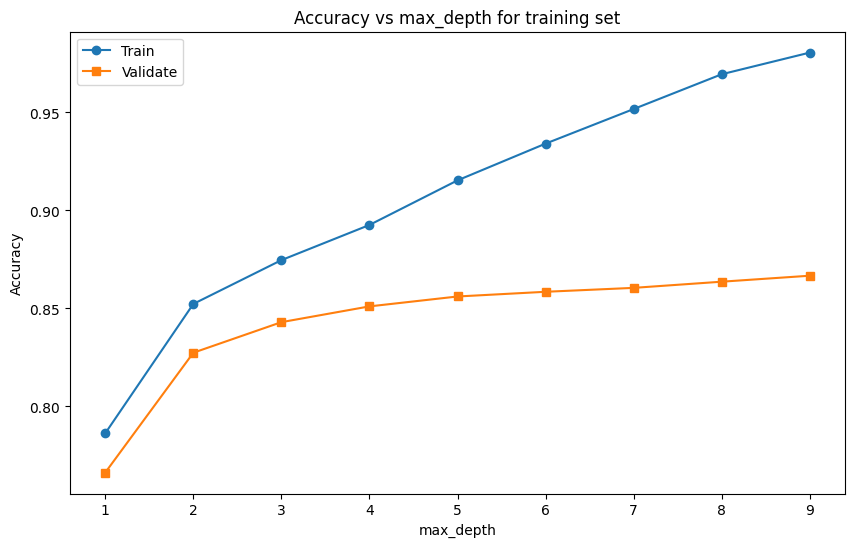

In [573]:
# Define a range of max_depth values to test
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_scores, validate_scores = [], []

# Loop over the max_depth values and calculate training, validation, and testing scores
for max_depth in max_depth_values:
    xgb_model = xgb.XGBClassifier(max_depth=max_depth)
    # Train the model
    xgb_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Plot the scores against max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train', marker='o')
plt.plot(max_depth_values, validate_scores, label='Validate', marker='s')
plt.title('Accuracy vs max_depth for training set')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [574]:
# Initialize XGBoost Classifier with the best parameters maxdepth
refined_xgb_model2 = xgb.XGBClassifier(
    max_depth=3
)

# Now you can fit and evaluate this model as before
refined_xgb_model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = refined_xgb_model2.predict(X_test)

# Make predictions on both the training and test sets
y_train_pred = refined_xgb_model2.predict(X_train)
y_test_pred = refined_xgb_model2.predict(X_test)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 87.465
Test Accuracy: 84.7047375783008


### XGB model 3 : Finetuning Min Child Weight

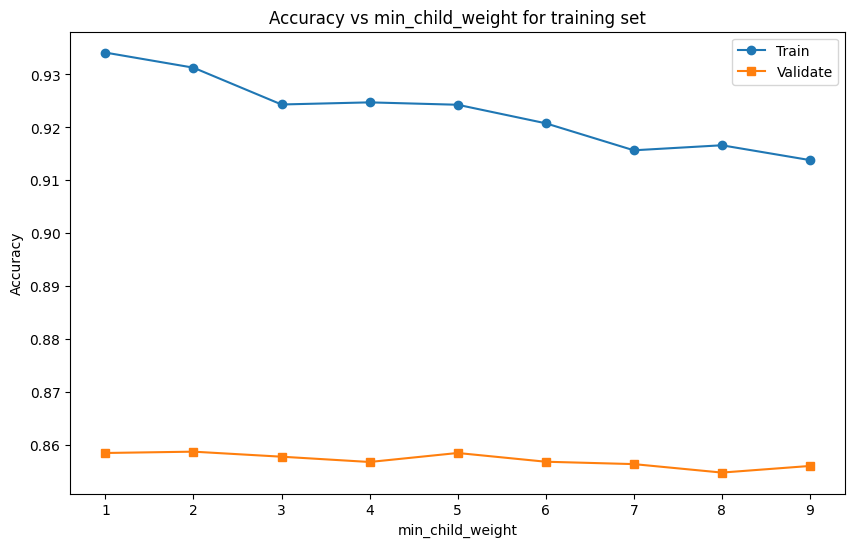

In [575]:
# Assuming X_train, y_train, X_test, y_test are already defined and available
# Define a range of min_child_weight values to test
min_child_weight_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_scores, validate_scores =  [], []

# Loop over the min_child_weight values and calculate training, validation, and testing scores
for min_child_weight in min_child_weight_values:
    xgb_model = xgb.XGBClassifier(
                                  min_child_weight=min_child_weight)
    # Train the model
    xgb_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Plot the scores against min_child_weight values
plt.figure(figsize=(10, 6))
plt.plot(min_child_weight_values, train_scores, label='Train', marker='o')
plt.plot(min_child_weight_values, validate_scores, label='Validate', marker='s')
plt.title('Accuracy vs min_child_weight for training set')
plt.xlabel('min_child_weight')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [576]:
# Initialize XGBoost Classifier with the best parameters maxdepth minchild weight
refined_xgb_model3 = xgb.XGBClassifier(
    max_depth=3,
    min_child_weight = 1

)

# Now you can fit and evaluate this model as before
refined_xgb_model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = refined_xgb_model3.predict(X_test)

# Make predictions on both the training and test sets
y_train_pred = refined_xgb_model3.predict(X_train)
y_test_pred = refined_xgb_model3.predict(X_test)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 87.465
Test Accuracy: 84.7047375783008


### XGB Model 4 : Finetuning Min Split Loss(gamma)

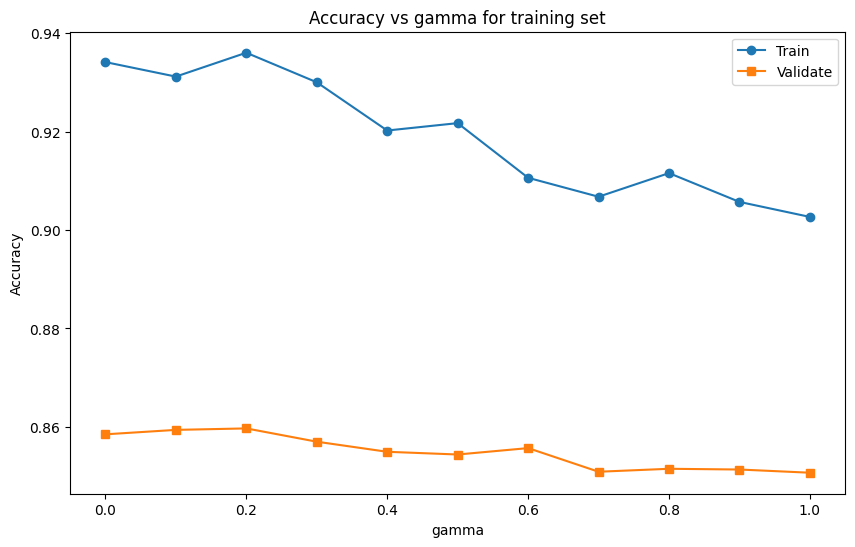

In [577]:
# Define a range of gamma values to test
gamma_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
train_scores, validate_scores = [], []

# Loop over the gamma values and calculate training, validation, and testing scores
for gamma in gamma_values:
    xgb_model = xgb.XGBClassifier(
                                  gamma=gamma)
    # Train the model
    xgb_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Plot the scores against gamma values
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train', marker='o')
plt.plot(gamma_values, validate_scores, label='Validate', marker='s')
plt.title('Accuracy vs gamma for training set')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [578]:
# Initialize XGBoost Classifier with the best parameters maxdepth minchild weight,gamma
refined_xgb_model4 = xgb.XGBClassifier(
    max_depth=3,
    min_child_weight = 1,
    gamma = 0.1

)

# Now you can fit and evaluate this model as before
refined_xgb_model4.fit(X_train, y_train)

# Make predictions on the test set
y_pred = refined_xgb_model4.predict(X_test)

# Make predictions on both the training and test sets
y_train_pred = refined_xgb_model4.predict(X_train)
y_test_pred = refined_xgb_model4.predict(X_test)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 87.465
Test Accuracy: 84.7047375783008


### XGB Model 5 : Fine Tuning Subsample

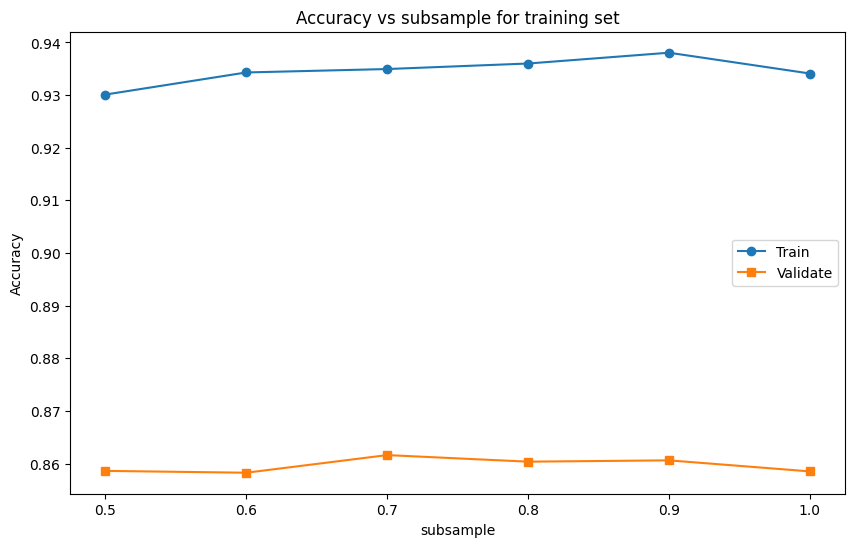

In [579]:
subsample_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_scores, validate_scores = [], []

# Loop over the subsample values and calculate training, validation, and testing scores
for subsample in subsample_values:
    xgb_model = xgb.XGBClassifier(
                                  subsample=subsample)
    # Train the model
    xgb_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))

# Plot the scores against subsample values
plt.figure(figsize=(10, 6))
plt.plot(subsample_values, train_scores, label='Train', marker='o')
plt.plot(subsample_values, validate_scores, label='Validate', marker='s')
plt.title('Accuracy vs subsample for training set')
plt.xlabel('subsample')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [580]:
# Initialize XGBoost Classifier with the best parameters maxdepth minchild weight,gamma,subsample
refined_xgb_model5 = xgb.XGBClassifier(
    max_depth=3,
    min_child_weight = 1,
    gamma = 0.1,
    subsample = 0.8

)

# Now you can fit and evaluate this model as before
refined_xgb_model5.fit(X_train, y_train)

# Make predictions on the test set
y_pred = refined_xgb_model5.predict(X_test)

# Make predictions on both the training and test sets
y_train_pred = refined_xgb_model5.predict(X_train)
y_test_pred = refined_xgb_model5.predict(X_test)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 87.38
Test Accuracy: 84.54053396582133


### XGB model 6 : Finetuning Learning Rate (eta)

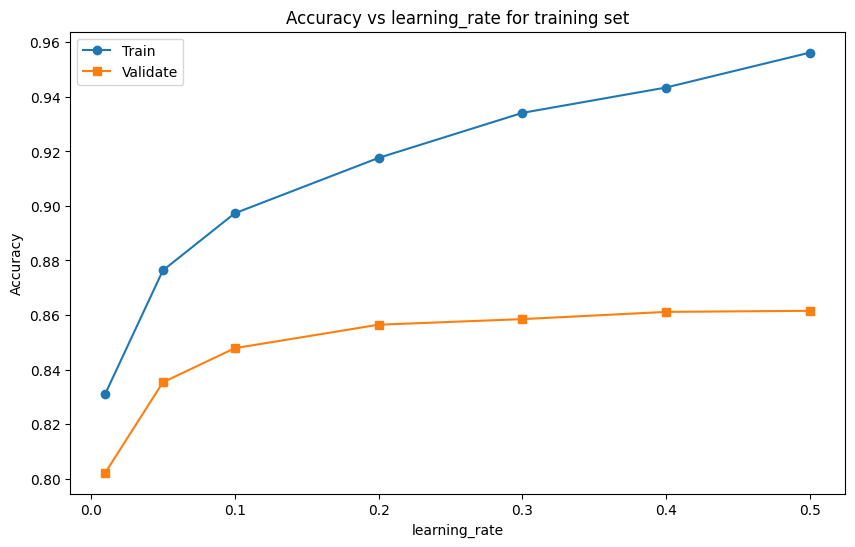

In [581]:
learning_rate_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
train_scores, validate_scores= [], []

# Loop over the learning_rate values and calculate training, validation, and testing scores
for learning_rate in learning_rate_values:
    xgb_model = xgb.XGBClassifier(
                                  learning_rate=learning_rate,
                                  )
    # Train the model
    xgb_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Plot the scores against learning_rate values
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_scores, label='Train', marker='o')
plt.plot(learning_rate_values, validate_scores, label='Validate', marker='s')
plt.title('Accuracy vs learning_rate for training set')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [582]:
# Initialize XGBoost Classifier with the best parameters maxdepth minchild weight,gamma,subsample,learning rate
refined_xgb_model6 = xgb.XGBClassifier(
    max_depth=3,
    min_child_weight = 1,
    gamma = 0.1,
    subsample = 0.8,
    learning_rate = 0.3

)

# Now you can fit and evaluate this model as before
refined_xgb_model6.fit(X_train, y_train)

# Make predictions on the test set
y_pred = refined_xgb_model6.predict(X_test)

# Make predictions on both the training and test sets
y_train_pred = refined_xgb_model6.predict(X_train)
y_test_pred = refined_xgb_model6.predict(X_test)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 87.38
Test Accuracy: 84.54053396582133


### XGB model 7 : finetuning n_estimators

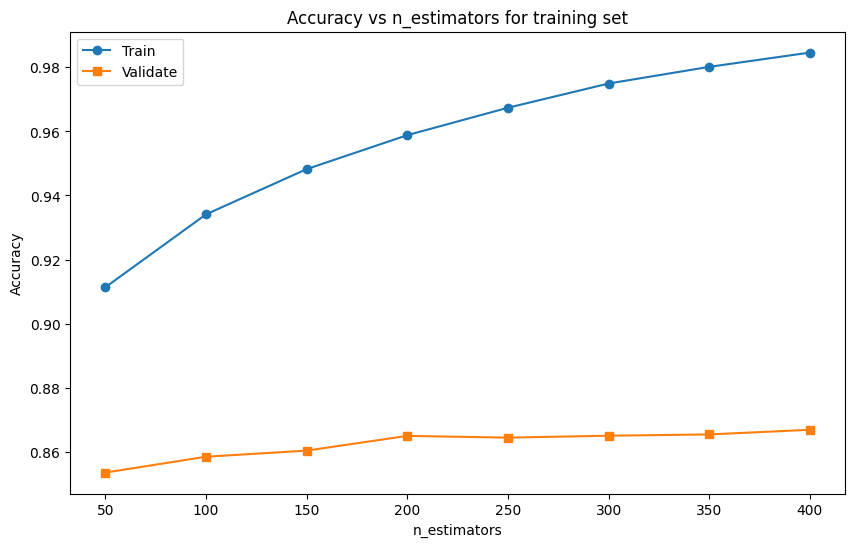

In [583]:
n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400]
train_scores, validate_scores=  [], []

# Loop over the n_estimators values and calculate training, validation, and testing scores
for n_estimators in n_estimators_values:
    xgb_model = xgb.XGBClassifier(
                                  n_estimators=n_estimators)
    # Train the model
    xgb_model.fit(X_train, y_train)
    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)
    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
    validate_scores.append(np.mean(val_score))


# Plot the scores against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train', marker='o')
plt.plot(n_estimators_values, validate_scores, label='Validate', marker='s')

plt.title('Accuracy vs n_estimators for training set')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [584]:
# Initialize XGBoost Classifier with the best parameters maxdepth minchild weight,gamma,subsample,learning rate
refined_xgb_model7 = xgb.XGBClassifier(
    max_depth=3,
    min_child_weight = 1,
    gamma = 0.1,
    subsample = 0.8,
    learning_rate = 0.3,
    n_estimators = 250

)

# Now you can fit and evaluate this model as before
refined_xgb_model7.fit(X_train, y_train)

# Make predictions on the test set
y_pred = refined_xgb_model7.predict(X_test)

# Make predictions on both the training and test sets
y_train_pred = refined_xgb_model7.predict(X_train)
y_test_pred = refined_xgb_model7.predict(X_test)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 89.63
Test Accuracy: 84.9844918810436


### XGB Model 8 : Implemeting Random search

In [585]:
# # Define the parameter grid to search
# param_grid = {
# #     'colsample_bytree': [0.3, 0.5, 0.7],
# #     'colsample_bylevel': [0.3, 0.5, 0.7],
# #     'colsample_bynode': [0.3, 0.5, 0.7],
#     'reg_lambda': [0.01, 0.1, 1],
#     'reg_alpha': [0.01, 0.1, 1],
#     'scale_pos_weight': [1, 3, 5]
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
#                            scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_parameters = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters found: ", best_parameters)
# print("Best cross-validated accuracy: {:.2f}%".format(best_score * 100))

In [586]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

# Define the parameter distribution to sample from during Random Search
param_dist = {
    'reg_lambda': uniform(0.01, 0.99),  # Search between 0.01 and 1
    'reg_alpha': uniform(0.01, 0.99),  # Search between 0.01 and 1
    'scale_pos_weight': randint(1, 6)  # Search between 1 and 5
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_parameters = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_parameters)
print("Best cross-validated accuracy: {:.2f}%".format(best_score * 100))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'reg_alpha': 0.3551793274188121, 'reg_lambda': 0.10521478558050655, 'scale_pos_weight': 1}
Best cross-validated accuracy: 86.14%


In [587]:
# Initialize XGBoost Classifier with the best parameters maxdepth minchild weight,gamma,subsample,learning rate
refined_xgb_final = xgb.XGBClassifier(
    max_depth=3,
    min_child_weight = 1,
    gamma = 0.1,
    subsample = 0.8,
    learning_rate = 0.3,
    n_estimators = 300,
    reg_alpha = 0.01,
    reg_lambda= 0.1,
    scale_pos_weight= 1,
    random_state = 42

)

# Now you can fit and evaluate this model as before
refined_xgb_final.fit(X_train, y_train)

# Make predictions on the test set
y_pred = refined_xgb_final.predict(X_test)

# Make predictions on both the training and test sets
y_train_pred = refined_xgb_final.predict(X_train)
y_test_pred = refined_xgb_final.predict(X_test)

# Calculate and print accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 90.215
Test Accuracy: 85.5683269476373


### Voting Classifer

In [588]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Assuming dt_refined_final, rf_refined_final, refined_xgb_final, and refined_mlp_final are already defined and trained
voting_clf = VotingClassifier(
    estimators=[
        ('dt', dt_refined_final),
        ('rf', rf_refined_final),
        ('xgb', refined_xgb_final),
#         ('mlp', refined_mlp_final)
    ],
    voting='soft'  # Use 'hard' for hard voting
)

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions and evaluate the voting classifier
y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8879
Test Accuracy: 0.8017


## Chosing Final Model

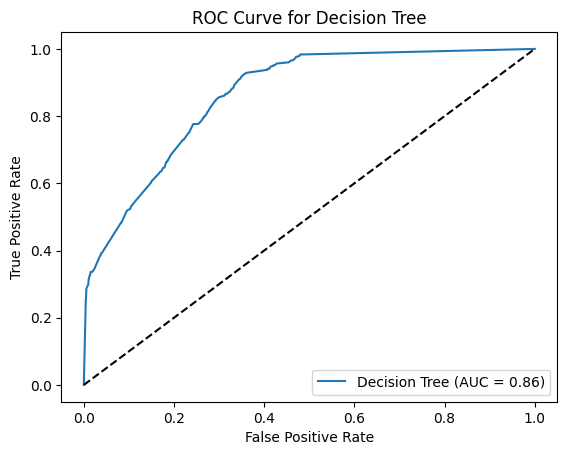

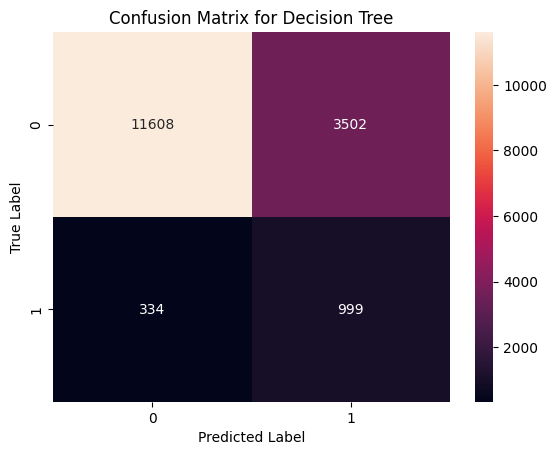

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     15110
           1       0.22      0.75      0.34      1333

    accuracy                           0.77     16443
   macro avg       0.60      0.76      0.60     16443
weighted avg       0.91      0.77      0.82     16443




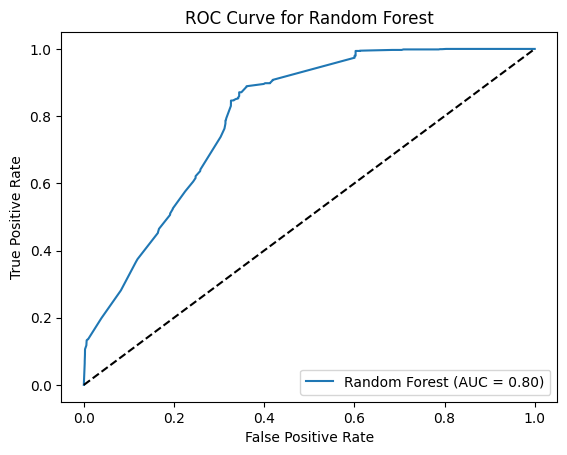

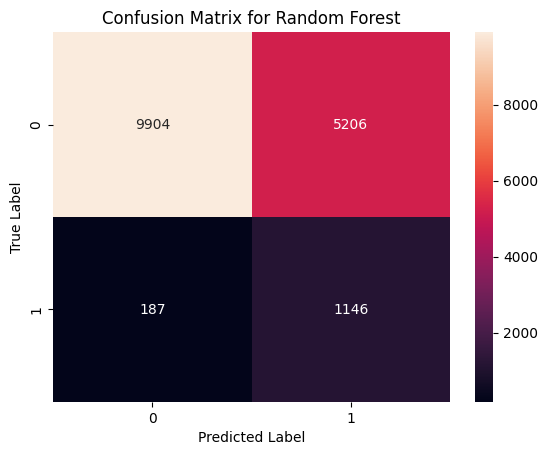

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     15110
           1       0.18      0.86      0.30      1333

    accuracy                           0.67     16443
   macro avg       0.58      0.76      0.54     16443
weighted avg       0.92      0.67      0.75     16443




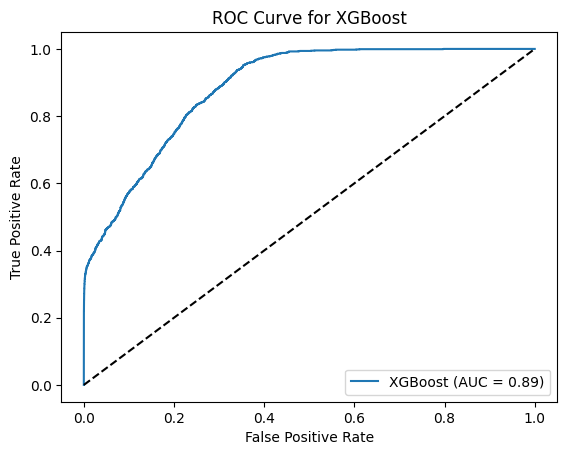

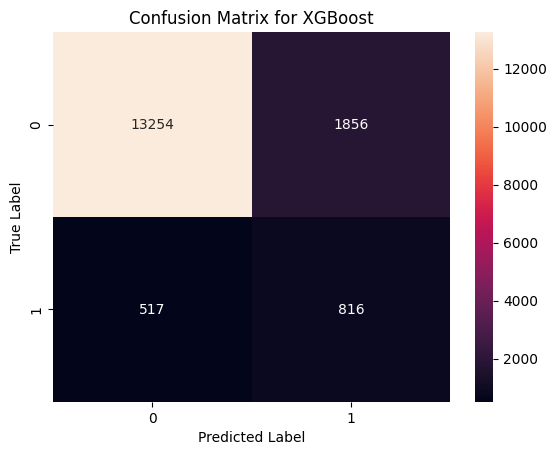

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     15110
           1       0.31      0.61      0.41      1333

    accuracy                           0.86     16443
   macro avg       0.63      0.74      0.66     16443
weighted avg       0.91      0.86      0.88     16443




In [589]:
# from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'Decision Tree': dt_refined_final,
    'Random Forest': rf_refined_final,
    'XGBoost': refined_xgb_final,
}

# Assuming X_test and y_test are your test features and labels
for name, model in models.items():
    # Compute probabilities and predicted classes
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Calculate ROC metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")


In [590]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Decision Tree': dt_refined_final,
    'Random Forest': rf_refined_final,
    'XGBoost': refined_xgb_final,
#     'MLP': refined_mlp_final
}

# Choose a scoring metric
scoring_metric = 'accuracy'  # You can change this to 'precision', 'recall', 'f1', etc., based on your problem's needs

# Perform cross-validation and store results
cv_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring=scoring_metric, n_jobs=-1)
    cv_scores[model_name] = np.mean(scores)

# Print average cross-validation scores
for model_name, score in cv_scores.items():
    print(f"{model_name} average CV {scoring_metric}: {score:.4f}")


Decision Tree average CV accuracy: 0.9349
Random Forest average CV accuracy: 0.9189
XGBoost average CV accuracy: 0.9373


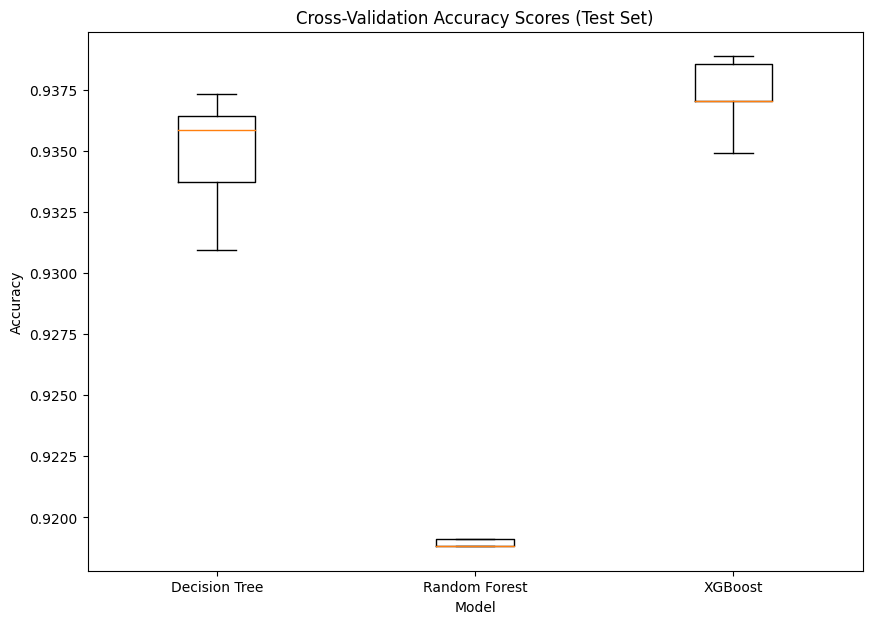

In [591]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation for each model using the test set (not typically recommended)
scores_dt = cross_val_score(dt_refined_final, X_test, y_test, cv=num_folds, scoring='accuracy')
scores_rf = cross_val_score(rf_refined_final, X_test, y_test, cv=num_folds, scoring='accuracy')
scores_xgb = cross_val_score(refined_xgb_final, X_test, y_test, cv=num_folds, scoring='accuracy')
scores_voting = cross_val_score(voting_clf, X_test, y_test, cv=num_folds, scoring='accuracy')

# Visualize the results
plt.figure(figsize=(10, 7))
plt.boxplot([scores_dt, scores_rf, scores_xgb], labels=['Decision Tree', 'Random Forest', 'XGBoost'])
plt.title('Cross-Validation Accuracy Scores (Test Set)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


# 2. Airbnb Regression

### 2.1 Load and Sample the data

In [592]:
abnb_data = pd.read_csv('centraldata6.csv')

In [593]:
abnb_data.head()

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,name_Luxury hostel with in-cabin locker - Single mixed,name_Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT,name_Studio Apartment - Oakwood Premier,name_Tasteful & Cozy 1 BR near SGH/Tiong Bahru,name_City-located 1BR loft apartment *BRAND NEW*,host_name_Jay,host_name_Alvin,host_name_Richards,host_name_Aaron,host_name_Darcy
0,227796,1.33235,103.78521,2,81,90,18,0.28,1,365,...,0,0,0,0,0,0,0,0,0,0
1,1439258,1.28875,103.80814,2,44,15,18,0.23,32,331,...,0,0,0,0,0,0,0,0,0,0
2,1439258,1.28837,103.81099,2,40,30,10,0.11,32,276,...,0,0,0,0,0,0,0,0,0,0
3,1521514,1.31125,103.83816,2,65,2,125,1.35,6,336,...,0,0,0,0,0,0,0,0,0,0
4,1439258,1.28976,103.80896,2,44,30,13,0.15,32,340,...,0,0,0,0,0,0,0,0,0,0


In [594]:
abnb_data.head()

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,name_Luxury hostel with in-cabin locker - Single mixed,name_Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT,name_Studio Apartment - Oakwood Premier,name_Tasteful & Cozy 1 BR near SGH/Tiong Bahru,name_City-located 1BR loft apartment *BRAND NEW*,host_name_Jay,host_name_Alvin,host_name_Richards,host_name_Aaron,host_name_Darcy
0,227796,1.33235,103.78521,2,81,90,18,0.28,1,365,...,0,0,0,0,0,0,0,0,0,0
1,1439258,1.28875,103.80814,2,44,15,18,0.23,32,331,...,0,0,0,0,0,0,0,0,0,0
2,1439258,1.28837,103.81099,2,40,30,10,0.11,32,276,...,0,0,0,0,0,0,0,0,0,0
3,1521514,1.31125,103.83816,2,65,2,125,1.35,6,336,...,0,0,0,0,0,0,0,0,0,0
4,1439258,1.28976,103.80896,2,44,30,13,0.15,32,340,...,0,0,0,0,0,0,0,0,0,0


In [595]:
abnb_data = abnb_data.select_dtypes(include=['int64', 'float64'])


In [596]:
abnb_subset = abnb_data[(abnb_data['price'] >= 10) & (abnb_data['price'] <= 140)]


In [597]:
import pandas as pd

# Assuming df is your DataFrame
num_rows = abnb_subset.shape

print(num_rows)


(3430, 24)


In [598]:
X = abnb_subset.drop('price', axis=1)
y = abnb_subset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [599]:
target = 'price'
correlations = abnb_subset.corr()[target].abs()
high_corr_features = correlations[(correlations >= 0.2) & (correlations.index != target)].index.tolist()
print(high_corr_features)

# Conduct Polynomial Expansion
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly.fit(X_train[high_corr_features])

# Transform and convert to DataFrame with correct column names
X_train_high_corr_poly = pd.DataFrame(poly.transform(X_train[high_corr_features]),
                                         columns=poly.get_feature_names_out(high_corr_features),
                                         index=X_train.index)
X_test_high_corr_poly = pd.DataFrame(poly.transform(X_test[high_corr_features]),
                                        columns=poly.get_feature_names_out(high_corr_features),
                                        index=X_test.index)

# Concatenate correctly
X_train = pd.concat([X_train_high_corr_poly, X_train.drop(columns=high_corr_features)], axis=1)
X_test = pd.concat([X_test_high_corr_poly, X_test.drop(columns=high_corr_features)], axis=1)

# Conduct Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if necessary
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

['room_type', 'calculated_host_listings_count']


### 2.2 Build the Model(s)

### Linear Regression

In [600]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model using the training data
linear_reg.fit(X_train, y_train)




LinearRegression()

### Random Forest Regressor

In [601]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Gradient Boosting Regressor

In [602]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model using the training data
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

### Ada Boost Regressor

In [603]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=42)

# Train the model using the training data
ada_regressor.fit(X_train, y_train)


AdaBoostRegressor(random_state=42)

### lightgbm

In [604]:
import lightgbm as lgb

# Initialize the LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(random_state=42)

# Train the model using the training data
lgb_regressor.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155


LGBMRegressor(random_state=42)

### XGB Regressor

In [605]:
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 2.3 Evaluate and Improve the Model(s)

### Linear Regression

In [606]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Predict on the training and testing data
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R^2: 0.6149
Test R^2: 0.6129
Train RMSE: 21.7354
Test RMSE: 21.3097


### Random Forest Regressor

In [607]:


# Predict on the training and testing data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R^2: 0.9619
Test R^2: 0.7357
Train RMSE: 6.8404
Test RMSE: 17.6083


### Gradient Boosting Regressor

In [608]:


# Predict on the training and testing data
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R^2: 0.7503
Test R^2: 0.6971
Train RMSE: 17.5007
Test RMSE: 18.8504


### Ada Boost Regressor

In [609]:


# Predict on the training and testing data
y_train_pred = ada_regressor.predict(X_train)
y_test_pred = ada_regressor.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R^2: 0.5973
Test R^2: 0.5803
Train RMSE: 22.2261
Test RMSE: 22.1882


### LightGBM

In [610]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Predict on the training and testing data
y_train_pred = lgb_regressor.predict(X_train)
y_test_pred = lgb_regressor.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R^2: 0.8930
Test R^2: 0.7114
Train RMSE: 11.4586
Test RMSE: 18.3998


### XGB Regressor

In [611]:
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R^2: 0.9756
Test R^2: 0.6820
Train RMSE: 5.4689
Test RMSE: 19.3150


### Improving GBR

Key Hyperparameters:
- n_estimators: The number of boosting stages or trees to be used in the ensemble. More trees can lead to a more complex model and potentially better performance, but also a higher chance of overfitting and longer training times.

- learning_rate: The step size shrinkage used to prevent overfitting. It scales the contribution of each tree by a factor of learning_rate. There is a trade-off between learning_rate and n_estimators.

- max_depth: The maximum depth of the individual regression estimators. This controls the depth of the tree and, hence, the complexity of the model. Deeper trees can capture more complex patterns but also can lead to overfitting.

- min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent creating nodes that represent too few instances.

- min_samples_leaf: The minimum number of samples required to be at a leaf node. A smaller leaf makes the model more prone to capturing noise in train data.

- min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

- max_features: The number of features to consider when looking for the best split. Options include integers, floats, "auto", "sqrt", "log2", or None.

- max_leaf_nodes: The maximum number of leaf nodes a tree can have. If None, there is no limit.

- min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

- subsample: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0, this results in Stochastic Gradient Boosting.

- loss: The loss function to be optimized. It defines the cost function that the algorithm tries to minimize. Common choices include 'ls' for least squares regression, 'lad' for least absolute deviation, etc.


Train R^2: 0.6536
Test R^2: 0.5935
Train RMSE: 43.3358
Test RMSE: 47.1285

### Model 2 - Fine Tuning n Estimators

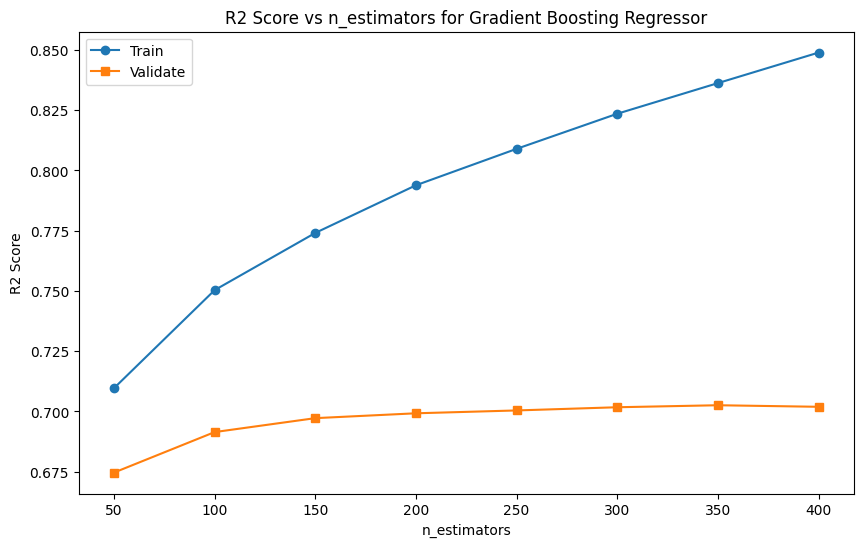

In [612]:
# n_estimators values to evaluate
n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400]
train_scores, validate_scores = [], []
# Loop over the n_estimators values and calculate training, validation, and testing scores
for n_estimators in n_estimators_values:
    gbr_model = GradientBoostingRegressor(n_estimators=n_estimators)

    # Train the model
    gbr_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = gbr_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train', marker='o')
plt.plot(n_estimators_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs n_estimators for Gradient Boosting Regressor')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [613]:
gbr_model_refined2 = GradientBoostingRegressor(n_estimators=250)
gbr_model_refined2.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = gbr_model_refined2.predict(X_train)
y_test_pred = gbr_model_refined2.predict(X_test)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.8089
Test R^2: 0.6914
Train RMSE: 15.3112
Test RMSE: 19.0283


### Model 3 - Fine Tuning Learning Rate

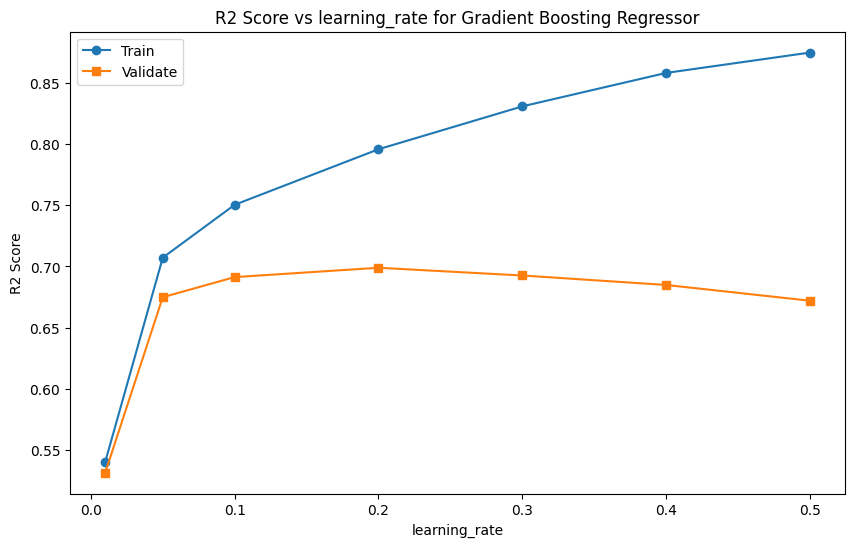

In [614]:

# Learning rate values to evaluate
learning_rate_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
train_scores, validate_scores = [], []

# Loop over the learning rate values and calculate training, validation, and testing scores
for learning_rate in learning_rate_values:
    gbr_model = GradientBoostingRegressor(learning_rate=learning_rate)

    # Train the model
    gbr_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = gbr_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))



# Plot the scores against learning rate values
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_scores, label='Train', marker='o')
plt.plot(learning_rate_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs learning_rate for Gradient Boosting Regressor')
plt.xlabel('learning_rate')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [615]:
gbr_model_refined3 = GradientBoostingRegressor(n_estimators=250,learning_rate = 0.2)
gbr_model_refined3.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = gbr_model_refined3.predict(X_train)
y_test_pred = gbr_model_refined3.predict(X_test)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.8720
Test R^2: 0.6849
Train RMSE: 12.5285
Test RMSE: 19.2271


### Model 4 - Finetuning max Depth

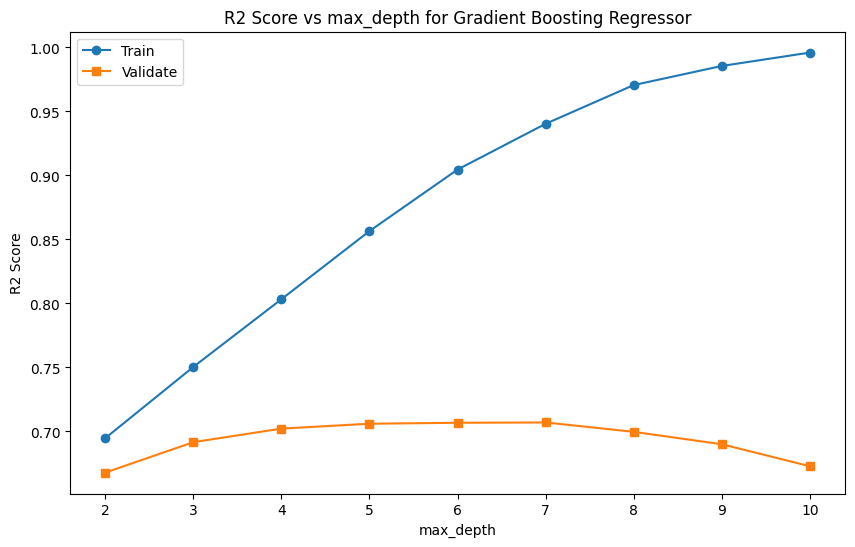

In [616]:

# max_depth values to evaluate
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, validate_scores = [], []

# Loop over the max_depth values and calculate training, validation, and testing scores
for max_depth in max_depth_values:
    gbr_model = GradientBoostingRegressor(max_depth=max_depth)

    # Train the model
    gbr_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = gbr_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train', marker='o')
plt.plot(max_depth_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs max_depth for Gradient Boosting Regressor')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [617]:
gbr_model_refined4 = GradientBoostingRegressor(n_estimators=250,learning_rate = 0.2,max_depth = 4)
gbr_model_refined4.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = gbr_model_refined4.predict(X_train)
y_test_pred = gbr_model_refined4.predict(X_test)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.9406
Test R^2: 0.6860
Train RMSE: 8.5371
Test RMSE: 19.1933


### Model 5 - Finetuning Min Sample Split

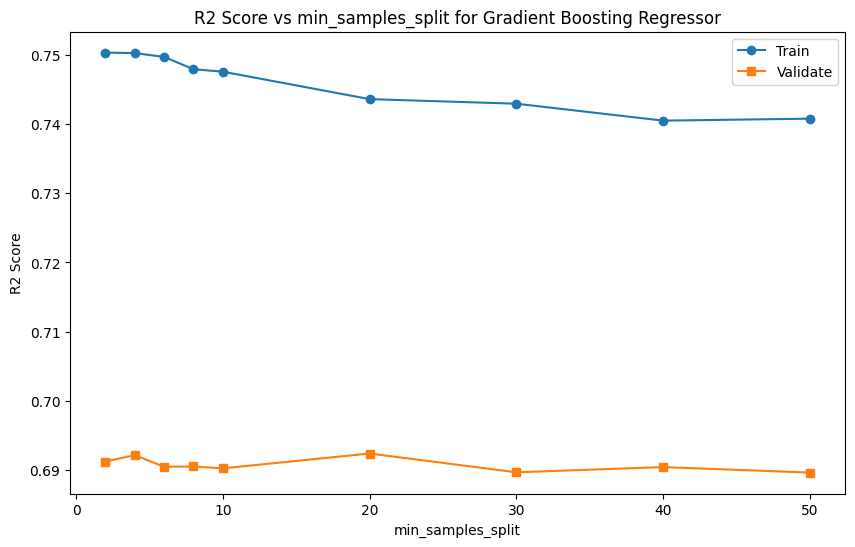

In [618]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# min_samples_split values to evaluate
min_samples_split_values = [2, 4, 6, 8, 10, 20, 30, 40, 50]
train_scores, validate_scores = [], []

# Loop over the min_samples_split values and calculate training, validation, and testing scores
for min_samples_split in min_samples_split_values:
    gbr_model = GradientBoostingRegressor(min_samples_split=min_samples_split)

    # Train the model
    gbr_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = gbr_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))



# Plot the scores against min_samples_split values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_scores, label='Train', marker='o')
plt.plot(min_samples_split_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs min_samples_split for Gradient Boosting Regressor')
plt.xlabel('min_samples_split')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [619]:
gbr_model_refined5 = GradientBoostingRegressor(n_estimators=250,learning_rate = 0.2,max_depth = 4,min_samples_split=20)
gbr_model_refined5.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = gbr_model_refined5.predict(X_train)
y_test_pred = gbr_model_refined5.predict(X_test)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.9241
Test R^2: 0.6837
Train RMSE: 9.6491
Test RMSE: 19.2620


### Model 6 - Finetuning Min Sample Leaf

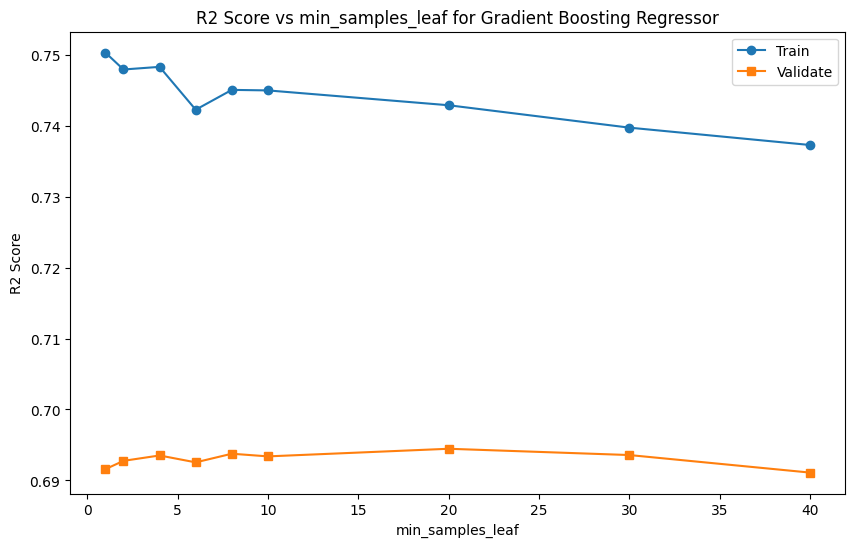

In [620]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# min_samples_leaf values to evaluate
min_samples_leaf_values = [1, 2, 4, 6, 8, 10, 20, 30, 40]
train_scores, validate_scores = [], []

# Loop over the min_samples_leaf values and calculate training, validation, and testing scores
for min_samples_leaf in min_samples_leaf_values:
    gbr_model = GradientBoostingRegressor(min_samples_leaf=min_samples_leaf)

    # Train the model
    gbr_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = gbr_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against min_samples_leaf values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_scores, label='Train', marker='o')
plt.plot(min_samples_leaf_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs min_samples_leaf for Gradient Boosting Regressor')
plt.xlabel('min_samples_leaf')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [621]:
gbr_model_refined6 = GradientBoostingRegressor(n_estimators=250,learning_rate = 0.2,max_depth = 4,min_samples_split=20,min_samples_leaf = 20)
gbr_model_refined6.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = gbr_model_refined6.predict(X_train)
y_test_pred = gbr_model_refined6.predict(X_test)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.9002
Test R^2: 0.6931
Train RMSE: 11.0619
Test RMSE: 18.9755


### Model 7 -Using Random Search

In [622]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid to sample from during the Random Search
param_dist = {
    'min_weight_fraction_leaf': uniform(0, 0.5),  # Continuous distribution from 0 to 0.5
    'max_features': ['auto', 'sqrt', 'log2', None] + list(range(1, X_train.shape[1]+1)),  # 'auto', 'sqrt', 'log2', None, or any number up to the number of features
    'max_leaf_nodes': [None] + list(range(2, 50)),  # None or integers
    'min_impurity_decrease': uniform(0, 0.2),  # Continuous distribution from 0 to 0.2
    'subsample': uniform(0.5, 0.5),  # Continuous distribution from 0.5 to 1.0
    'loss': ['ls', 'lad', 'huber', 'quantile'],  # Different loss functions
}

# Instantiate a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled. Adjust based on computational resources
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric. Adjust as necessary for your problem
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV instance to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)  # Note: score will be negative MSE, so we take the negative to get MSE


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Parameters: {'loss': 'huber', 'max_features': 26, 'max_leaf_nodes': 13, 'min_impurity_decrease': 0.1721461166512687, 'min_weight_fraction_leaf': 0.0034760652655953517, 'subsample': 0.7553736512887829}
Best Score: 372.9556582762734


In [623]:
gbr_model_refined7 = GradientBoostingRegressor(n_estimators=250,learning_rate = 0.2,max_depth = 4,min_samples_split=20,
                                              min_samples_leaf = 20,
                                              loss= 'huber', max_features = 26, max_leaf_nodes= 13            )

gbr_model_refined7.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = gbr_model_refined7.predict(X_train)
y_test_pred = gbr_model_refined7.predict(X_test)

# Calculate the R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.8784
Test R^2: 0.7041
Train RMSE: 12.2129
Test RMSE: 18.6299


### Model 8 - Adding in Regularisers

In [624]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

gbr_model_final = GradientBoostingRegressor(
    n_estimators=250,          # Number of trees
    learning_rate=0.2,         # Controls the contribution of each tree
    max_depth=4,               # Maximum depth of each tree
    min_samples_split=20,      # Minimum number of samples required to split an internal node
    min_samples_leaf=20,       # Minimum number of samples required to be at a leaf node
    loss='huber',              # 'huber' is more robust to outliers
    max_features=26,           # Number of features to consider when looking for the best split
    max_leaf_nodes=13,         # Maximum number of terminal nodes in the trees
    subsample=0.8,             # Fraction of samples to be used for fitting individual base learners
    min_weight_fraction_leaf=0.01,  # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    min_impurity_decrease=0.01,     # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    random_state = 42
)

# Assume X_train, y_train, X_test, y_test are defined and contain your dataset
gbr_model_final.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = gbr_model_final.predict(X_train)
y_test_pred = gbr_model_final.predict(X_test)

# Calculate the R^2 score and RMSE
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R^2: 0.8764
Test R^2: 0.7023
Train RMSE: 12.3131
Test RMSE: 18.6869


## Improving XGB Regressor

Key Hyperparameters:
- n_estimators: Number of gradient boosted trees. Equivalent to the number of boosting rounds.
- learning_rate (or eta): Step size shrinkage used to prevent overfitting. It scales the contribution of each tree.
- max_depth: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
- min_child_weight: Minimum sum of instance weight (hessian) needed in a child. Higher values prevent the model from learning relations which might be highly specific to the particular sample selected for a tree.
- subsample: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost randomly collects half of the data instances to grow trees and this prevents overfitting.
- colsample_bytree: Subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
- colsample_bylevel and colsample_bynode: These parameters work similarly to colsample_bytree but operate at each level and each node of a tree, respectively.

Regularization Parameters:
- gamma (or min_split_loss): Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger the value, the more conservative the algorithm will be, acting as a regularization.
- lambda (or reg_lambda): L2 regularization term on weights. It's used to avoid overfitting and control the model's complexity by penalizing large weights.
- alpha (or reg_alpha): L1 regularization term on weights. Similar to lambda, but it penalizes the absolute value of the weights, leading to sparser models with fewer non-zero coefficients.


Baseline : Train R^2: 0.9428
Test R^2: 0.6694
Train RMSE: 17.6135
Test RMSE: 42.4978

### XGB R Model 2 - finetuning n estimators

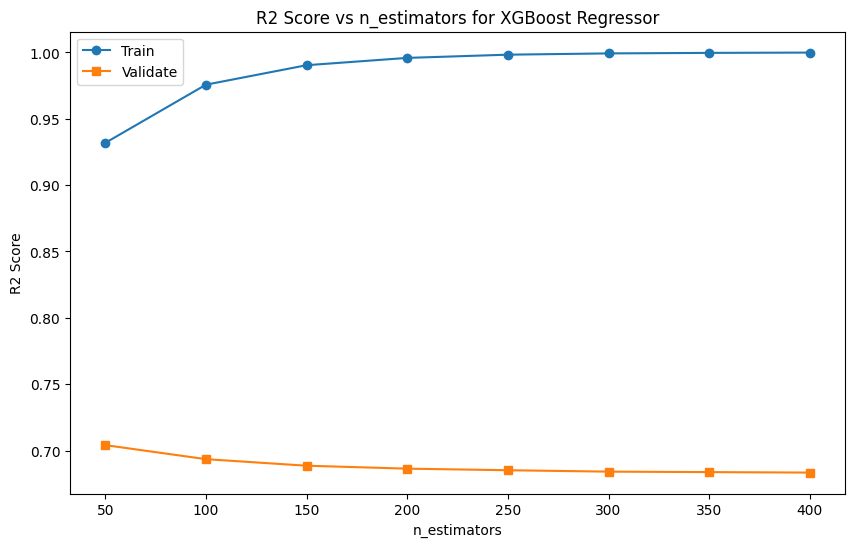

In [625]:
# n_estimators values to evaluate
n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400]
train_scores, validate_scores = [], []

# Loop over the n_estimators values and calculate training, validation, and testing scores
for n_estimators in n_estimators_values:
    xgb_model = xgb.XGBRegressor(n_estimators=n_estimators)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train', marker='o')
plt.plot(n_estimators_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs n_estimators for XGBoost Regressor')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [626]:
xgb_regressor2 = xgb.XGBRegressor(n_estimators= 50)
xgb_regressor2.fit(X_train, y_train)
y_train_pred = xgb_regressor2.predict(X_train)
y_test_pred = xgb_regressor2.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.9318
Test R^2: 0.6997
Train RMSE: 9.1486
Test RMSE: 18.7693


### XGB R Model 3 - finetune learning rate

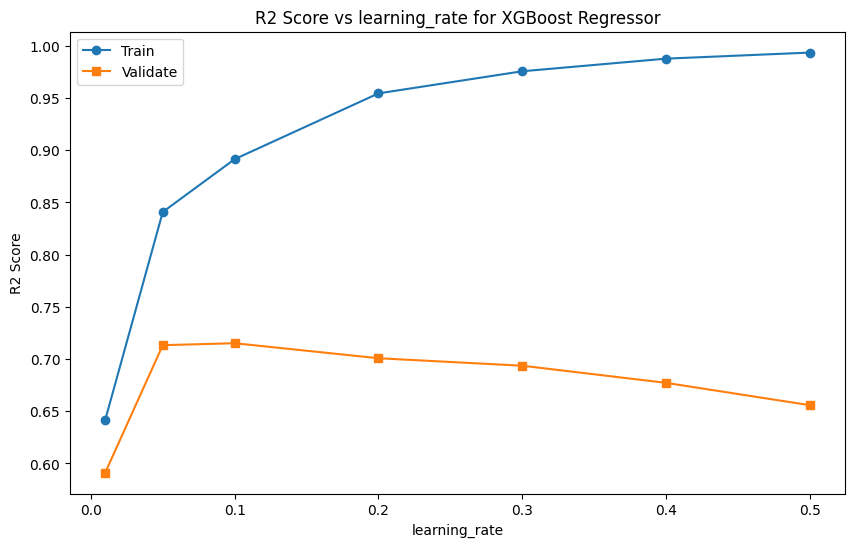

In [627]:
# learning_rate values to evaluate
learning_rate_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
train_scores, validate_scores = [], []

# Loop over the learning_rate values and calculate training, validation, and testing scores
for learning_rate in learning_rate_values:
    xgb_model = xgb.XGBRegressor(learning_rate=learning_rate)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against learning_rate values
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_scores, label='Train', marker='o')
plt.plot(learning_rate_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs learning_rate for XGBoost Regressor')
plt.xlabel('learning_rate')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [628]:
xgb_regressor3 = xgb.XGBRegressor(n_estimators= 50,learning_rate=0.2)
xgb_regressor3.fit(X_train, y_train)
y_train_pred = xgb_regressor3.predict(X_train)
y_test_pred = xgb_regressor3.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.9007
Test R^2: 0.7031
Train RMSE: 11.0368
Test RMSE: 18.6639


### XGB R Model 4 - finetuning max depth

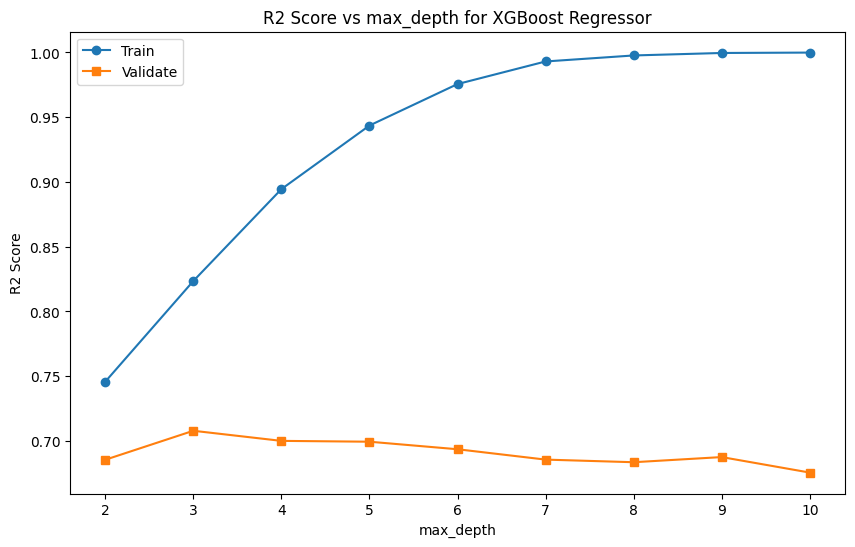

In [629]:
# max_depth values to evaluate
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, validate_scores = [], []

# Loop over the max_depth values and calculate training, validation, and testing scores
for max_depth in max_depth_values:
    xgb_model = xgb.XGBRegressor(max_depth=max_depth)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train', marker='o')
plt.plot(max_depth_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs max_depth for XGBoost Regressor')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [630]:
xgb_regressor4 = xgb.XGBRegressor(n_estimators= 50,learning_rate=0.2, max_depth = 6)
xgb_regressor4.fit(X_train, y_train)
y_train_pred = xgb_regressor4.predict(X_train)
y_test_pred = xgb_regressor4.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.9007
Test R^2: 0.7031
Train RMSE: 11.0368
Test RMSE: 18.6639


### XGB R model 5 - finetuning min samples leaf

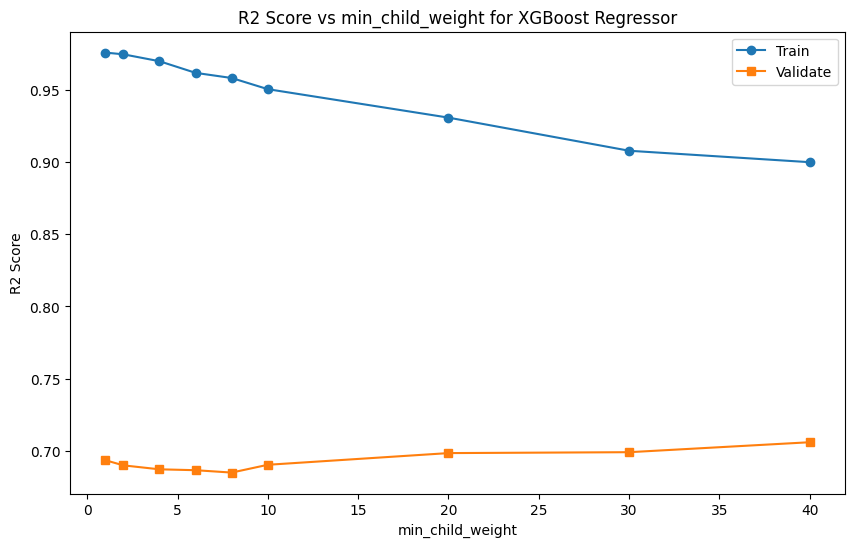

In [631]:
# min_child_weight values to evaluate
min_child_weight_values = [1, 2, 4, 6, 8, 10, 20, 30, 40]
train_scores, validate_scores = [], []

# Loop over the min_child_weight values and calculate training, validation, and testing scores
for min_child_weight in min_child_weight_values:
    xgb_model = xgb.XGBRegressor(min_child_weight=min_child_weight)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = xgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against min_child_weight values
plt.figure(figsize=(10, 6))
plt.plot(min_child_weight_values, train_scores, label='Train', marker='o')
plt.plot(min_child_weight_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs min_child_weight for XGBoost Regressor')
plt.xlabel('min_child_weight')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [632]:
xgb_regressor5 = xgb.XGBRegressor(n_estimators= 50,learning_rate=0.2, max_depth = 6,min_child_weight =15)
xgb_regressor5.fit(X_train, y_train)
y_train_pred = xgb_regressor5.predict(X_train)
y_test_pred = xgb_regressor5.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.8636
Test R^2: 0.7185
Train RMSE: 12.9363
Test RMSE: 18.1729


### XGB R model 6 -Random search

In [633]:

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform

# Define the parameter grid to sample from during Random Search
param_dist = {
    'subsample': uniform(0.5, 0.5),  # Continuous distribution from 0.5 to 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # Continuous distribution from 0.5 to 1.0
    'colsample_bylevel': uniform(0.5, 0.5),  # Continuous distribution from 0.5 to 1.0
    'colsample_bynode': uniform(0.5, 0.5),  # Continuous distribution from 0.5 to 1.0
}

# Instantiate an XGBoost regressor model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV instance to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)  # Note: score will be negative MSE, so we take the negative to get MSE


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bylevel': 0.6860090428963916, 'colsample_bynode': 0.8882064803709984, 'colsample_bytree': 0.6704017701265089, 'subsample': 0.9653786628017824}
Best Score: 364.95355637948944


In [634]:
xgb_regressor6 = xgb.XGBRegressor(n_estimators= 50,learning_rate=0.2, max_depth = 6,min_child_weight =15,
                                colsample_bylevel= 0.7, colsample_bynode= 0.6, colsample_bytree= 1, subsample = 0.93)
xgb_regressor6.fit(X_train, y_train)
y_train_pred = xgb_regressor6.predict(X_train)
y_test_pred = xgb_regressor6.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.8559
Test R^2: 0.7199
Train RMSE: 13.2966
Test RMSE: 18.1280


### XGB R model 7 -introducing regularizers

In [635]:
xgb_regressor_final = xgb.XGBRegressor(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=6,
    min_child_weight=15,
    colsample_bylevel=0.7,
    colsample_bynode=0.6,
    colsample_bytree=1,
    subsample=0.93,
    reg_lambda=1,  # L2 regularization term on weights. Increase this value for stronger L2 regularization.
    reg_alpha=0.1,  # L1 regularization term on weights. Increase this value for stronger L1 regularization.
    random_state = 42
)

xgb_regressor_final.fit(X_train, y_train)

y_train_pred = xgb_regressor_final.predict(X_train)
y_test_pred = xgb_regressor_final.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.8591
Test R^2: 0.7104
Train RMSE: 13.1451
Test RMSE: 18.4306


### Improving LightGBM

Key Hyperparameters:
- num_leaves: The maximum number of leaves in one tree. Too high a number can lead to overfitting.

- max_depth: The maximum depth of a tree. Used to limit the tree's depth explicitly.

- learning_rate: The shrinkage rate or step size for each iteration of tree building. Smaller values make the model more robust by forcing it to learn slowly.

- n_estimators (or num_boost_round in LightGBM API): The number of boosting iterations or trees to build.

- min_data_in_leaf (or min_child_samples): The minimum number of data needed in a leaf. Can be used to deal with overfitting.

- feature_fraction (or colsample_bytree): The fraction of features to be used for each tree. Subsampling will occur once at every iteration (tree).

- bagging_fraction (or subsample): The fraction of data to be used for each iteration. This is similar to subsampling of the dataset.

- bagging_freq: Specifies how often to perform bagging at every Kth iteration.

Regularization Parameters:
- lambda_l1 (or reg_alpha): L1 regularization term on weights (equivalent to Lasso regression). Larger values encourage sparsity.

- lambda_l2 (or reg_lambda): L2 regularization term on weights (equivalent to Ridge regression). Helps to avoid overfitting by smoothing the weights.

- min_gain_to_split: The minimum gain to perform a split. This can be used to control over-complex trees.

### LGBM Model 2 - Finetuning Num Leaves

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 2195, number of used features: 20
[LightGBM] [Info] Start training from score 83.510706
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of te

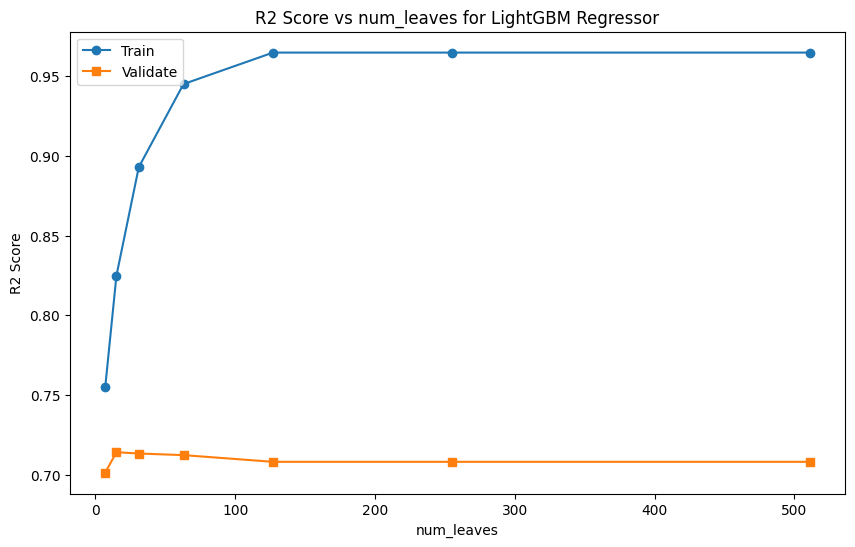

In [636]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# num_leaves values to evaluate
num_leaves_values = [7, 15, 31, 63, 127, 255, 511]
train_scores, validate_scores = [], []

# Loop over the num_leaves values and calculate training, validation, and testing scores
for num_leaves in num_leaves_values:
    lgb_model = lgb.LGBMRegressor(num_leaves=num_leaves)

    # Train the model
    lgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = lgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against num_leaves values
plt.figure(figsize=(10, 6))
plt.plot(num_leaves_values, train_scores, label='Train', marker='o')
plt.plot(num_leaves_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs num_leaves for LightGBM Regressor')
plt.xlabel('num_leaves')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [637]:

# Initialize the LightGBM Regressor
lgb_regressor2 = lgb.LGBMRegressor(num_leaves = 50)

# Train the model using the training data
lgb_regressor2.fit(X_train, y_train)
# Predict on the training and testing data
y_train_pred = lgb_regressor2.predict(X_train)
y_test_pred = lgb_regressor2.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
Train R^2: 0.9318
Test R^2: 0.7179
Train RMSE: 9.1453
Test RMSE: 18.1906


### LGBM Model 3 - Finetuning Max Depth

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 2195, number of used features: 20
[LightGBM] [Info] Start training from score 83.510706
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

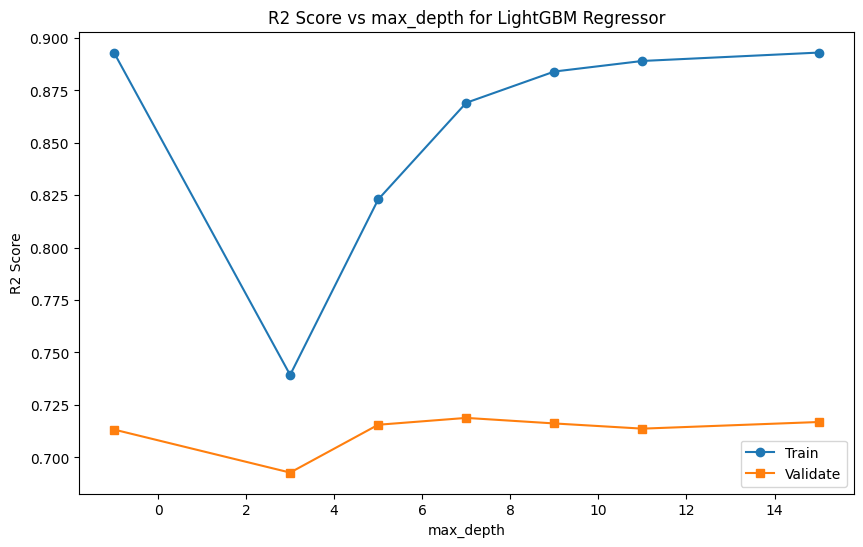

In [638]:
# max_depth values to evaluate
max_depth_values = [-1, 3, 5, 7, 9, 11, 15]
train_scores, validate_scores = [], []

# Loop over the max_depth values and calculate training, validation, and testing scores
for max_depth in max_depth_values:
    lgb_model = lgb.LGBMRegressor(max_depth=max_depth)

    # Train the model
    lgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = lgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))

# Plot the scores against max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train', marker='o')
plt.plot(max_depth_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs max_depth for LightGBM Regressor')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [639]:

# Initialize the LightGBM Regressor
lgb_regressor3 = lgb.LGBMRegressor(num_leaves = 50,max_depth = 3)

# Train the model using the training data
lgb_regressor3.fit(X_train, y_train)
# Predict on the training and testing data
y_train_pred = lgb_regressor3.predict(X_train)
y_test_pred = lgb_regressor3.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

### LGBM Model 4 - Finetuning Learning Rate

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 2195, number of used features: 20
[LightGBM] [Info] Start training from score 83.510706
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

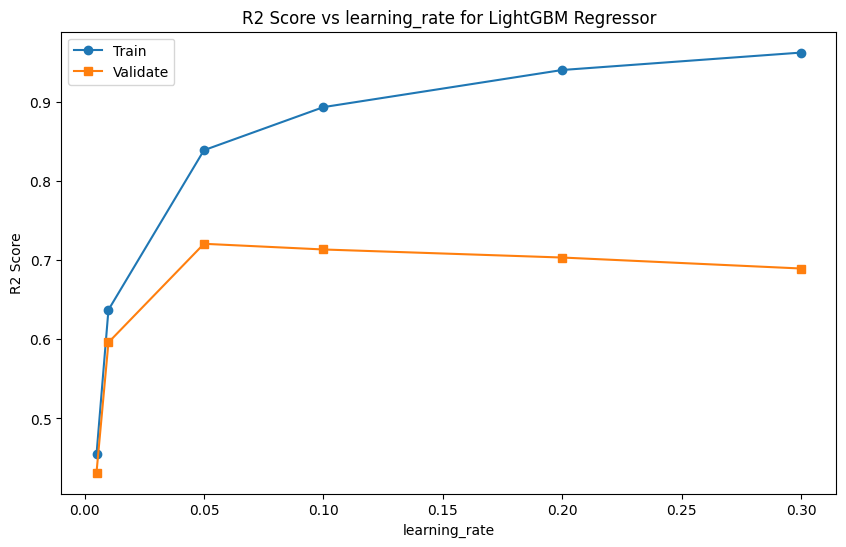

In [640]:
# learning_rate values to evaluate
learning_rate_values = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
train_scores, validate_scores = [], []

# Loop over the learning_rate values and calculate training, validation, and testing scores
for learning_rate in learning_rate_values:
    lgb_model = lgb.LGBMRegressor(learning_rate=learning_rate)

    # Train the model
    lgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = lgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))

# Plot the scores against learning_rate values
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_scores, label='Train', marker='o')
plt.plot(learning_rate_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs learning_rate for LightGBM Regressor')
plt.xlabel('learning_rate')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [641]:

# Initialize the LightGBM Regressor
lgb_regressor4 = lgb.LGBMRegressor(num_leaves = 50,max_depth = 3,learning_rate = 0.15)

# Train the model using the training data
lgb_regressor4.fit(X_train, y_train)
# Predict on the training and testing data
y_train_pred = lgb_regressor4.predict(X_train)
y_test_pred = lgb_regressor4.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### LGBM Model 5 - Finetuning n estimators

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 2195, number of used features: 20
[LightGBM] [Info] Start training from score 83.510706
[LightGBM] [Warning] Found w

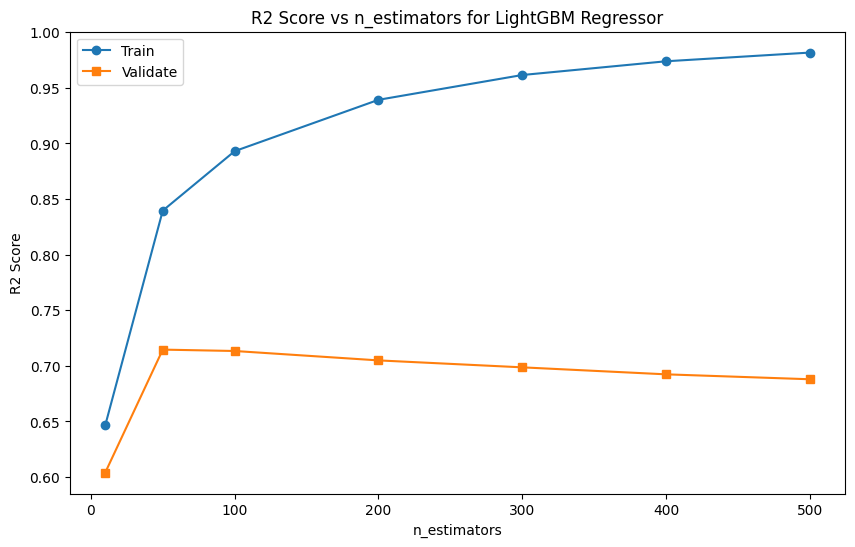

In [642]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# n_estimators values to evaluate
n_estimators_values = [10, 50, 100, 200, 300, 400, 500]
train_scores, validate_scores = [], []

# Loop over the n_estimators values and calculate training, validation, and testing scores
for n_estimators in n_estimators_values:
    lgb_model = lgb.LGBMRegressor(n_estimators=n_estimators)

    # Train the model
    lgb_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = lgb_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train', marker='o')
plt.plot(n_estimators_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs n_estimators for LightGBM Regressor')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [643]:

# Initialize the LightGBM Regressor
lgb_regressor5 = lgb.LGBMRegressor(num_leaves = 50,max_depth = 3,learning_rate = 0.15,n_estimators = 100)

# Train the model using the training data
lgb_regressor5.fit(X_train, y_train)
# Predict on the training and testing data
y_train_pred = lgb_regressor5.predict(X_train)
y_test_pred = lgb_regressor5.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 2744, number of used features: 21
[LightGBM] [Info] Start training from score 83.529155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### LGBM Model 6 - Random Search

In [644]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import lightgbm as lgb
from scipy.stats import randint, uniform

# Define the parameter grid to sample from during Random Search
param_dist = {
    'min_data_in_leaf': randint(20, 100),  # Min number of data in leaf
    'feature_fraction': uniform(0.5, 0.5),  # Fraction of features used per tree
    'bagging_fraction': uniform(0.5, 0.5),  # Fraction of data to use for bagging
    'bagging_freq': randint(1, 7)  # Frequency for bagging
}

# Instantiate a LightGBM regressor model
lgbm_regressor = lgb.LGBMRegressor()

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=lgbm_regressor,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled. Adjust based on your computational budget
    scoring='neg_mean_squared_error',  # Change scoring metric if necessary
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Assuming X_train, y_train are already defined
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)  # Score will be negative MSE, take the negative to get MSE


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.6015306123673847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6015306123673847
[LightGBM] [Warning] bagging_fraction is set=0.8022086896389087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8022086896389087
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.6015306123673847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6015306123673847
[LightGBM] [Warning] bagging_fraction is set=0.802

In [645]:

# Initialize the LightGBM Regressor
lgb_regressor6 = lgb.LGBMRegressor(num_leaves = 50,max_depth = 3,learning_rate = 0.15,n_estimators = 100,
                                 bagging_fraction= 0.8355717584120252, bagging_freq= 2,
                                  feature_fraction= 0.6270818245348694, min_data_in_leaf =21)

# Train the model using the training data
lgb_regressor6.fit(X_train, y_train)
# Predict on the training and testing data
y_train_pred = lgb_regressor6.predict(X_train)
y_test_pred = lgb_regressor6.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.6270818245348694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6270818245348694
[LightGBM] [Warning] bagging_fraction is set=0.8355717584120252, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8355717584120252
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.6270818245348694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6270818245348694
[LightGBM] [Warning] bagging_fraction is set=0.8355717584120252, subsample=1.0 will be ignored. Current value: ba

### LGBM Model 7 - Regularization

In [646]:
# Initialize the LightGBM Regressor with regularization parameters
lgb_regressor_final = lgb.LGBMRegressor(
    num_leaves=100,
    max_depth=3,
    learning_rate=0.14,
    n_estimators=91,
    bagging_fraction=0.8,
    bagging_freq=3,
    feature_fraction=0.6,
    min_data_in_leaf=21,
    lambda_l1=0.5,  # L1 regularization term on weights
    lambda_l2=0.5,
    random_state = 42
)

# Train the model using the training data
lgb_regressor_final.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = lgb_regressor_final.predict(X_train)
y_test_pred = lgb_regressor_final.predict(X_test)

# Calculate the R^2 score and RMSE for both sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [

### Improving Random Forest Regressor

Key Hyperparameters:
- n_estimators: The number of trees in the forest. Increasing this number generally improves model performance but also increases computational cost.

- max_depth: The maximum depth of the trees. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Specifying a depth can help prevent overfitting.

- min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent the model from learning too specific patterns, which might be noise.

- min_samples_leaf: The minimum number of samples required to be at a leaf node. Setting this higher can smooth the model, especially for regression.

- max_features: The number of features to consider when looking for the best split. Options include integers (exact number of features), floats (percentage), and "auto", "sqrt", "log2" (square root and log base 2 of the number of features, respectively).

- max_leaf_nodes: Controls the maximum number of leaf nodes a tree can have. If None, there is no limit.

- min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights required to be at a leaf node.

- bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

Regularization Parameters:
max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes, and min_weight_fraction_leaf can all act as regularization parameters by controlling the size and complexity of the trees.

### RFR Model 2 - finetuning n estimators

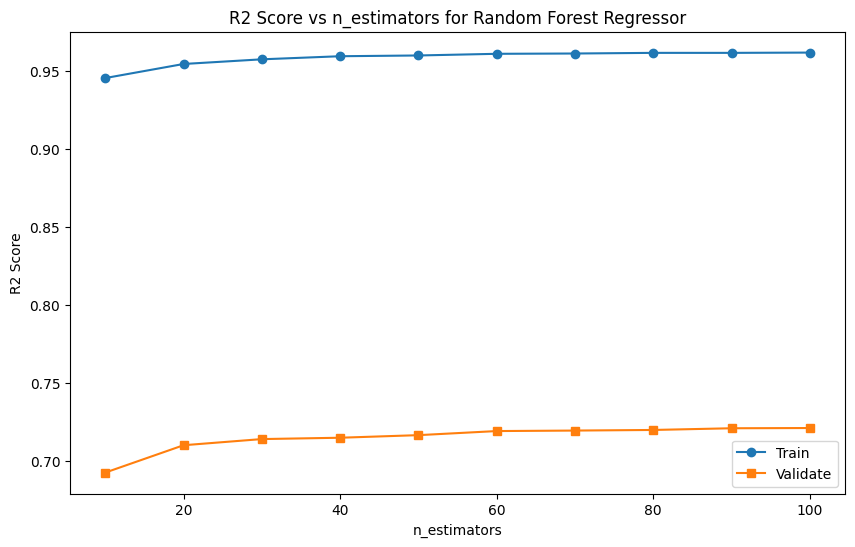

In [647]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# n_estimators values to evaluate
n_estimators_values = [10,20,30,40, 50,60,70,80,90, 100]
train_scores, validate_scores = [], []

# Loop over the n_estimators values and calculate training, validation, and testing scores
for n_estimators in n_estimators_values:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))

# Plot the scores against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train', marker='o')
plt.plot(n_estimators_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs n_estimators for Random Forest Regressor')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [648]:

# Initialize the Random Forest Regressor
rf_regressor2 = RandomForestRegressor(n_estimators = 50)

# Train the model using the training data
rf_regressor2.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = rf_regressor2.predict(X_train)
y_test_pred = rf_regressor2.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.9614
Test R^2: 0.7334
Train RMSE: 6.8844
Test RMSE: 17.6848


### RFR Model 3 - finetuning Max depth

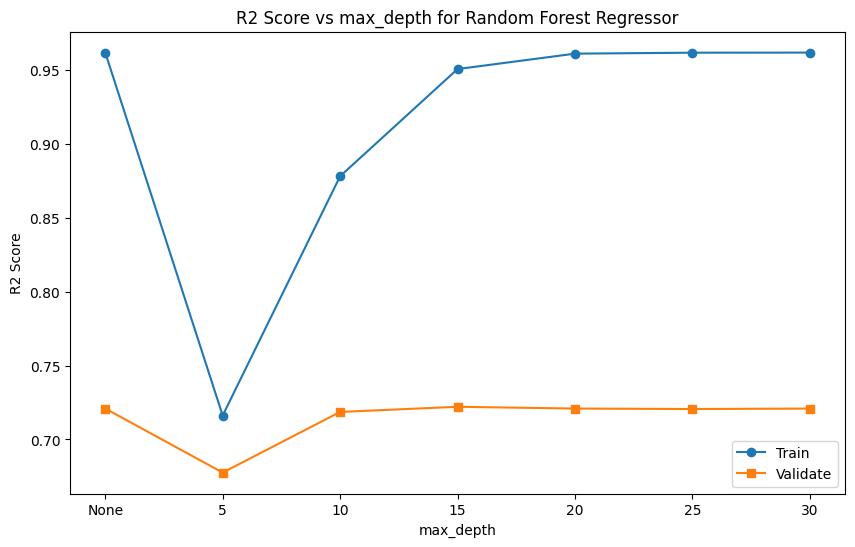

In [649]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# max_depth values to evaluate
max_depth_values = [None, 5, 10, 15, 20, 25, 30]
train_scores, validate_scores = [], []

# Loop over the max_depth values and calculate training, validation, and testing scores
for max_depth in max_depth_values:
    rf_model = RandomForestRegressor(max_depth=max_depth, n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))



# Plot the scores against max_depth values
plt.figure(figsize=(10, 6))
plt.plot([str(md) for md in max_depth_values], train_scores, label='Train', marker='o')  # Convert max_depth to string for plotting
plt.plot([str(md) for md in max_depth_values], validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs max_depth for Random Forest Regressor')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [650]:

# Initialize the Random Forest Regressor
rf_regressor3 = RandomForestRegressor(n_estimators = 50,max_depth = 10)

# Train the model using the training data
rf_regressor3.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = rf_regressor3.predict(X_train)
y_test_pred = rf_regressor3.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.8759
Test R^2: 0.7260
Train RMSE: 12.3378
Test RMSE: 17.9275


### RFR Model 4 - finetuning Min Sample Leaf

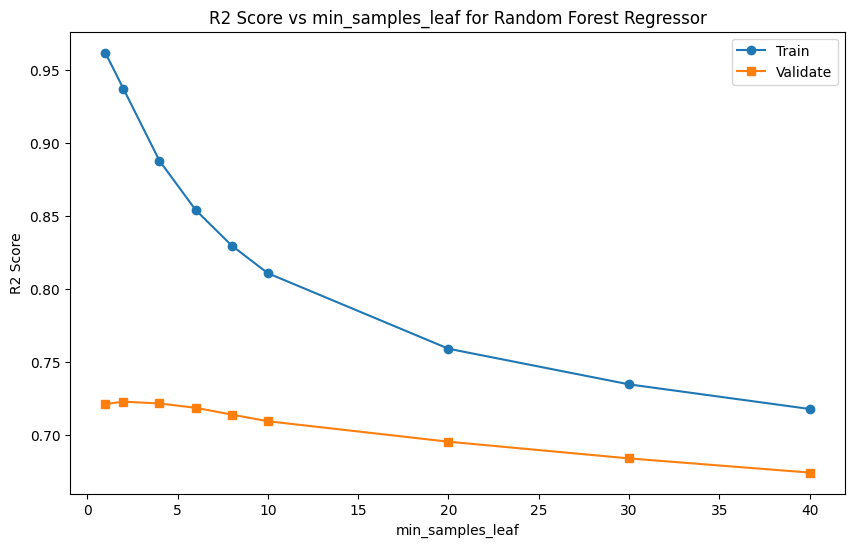

In [651]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# min_samples_leaf values to evaluate
min_samples_leaf_values = [1, 2, 4, 6, 8, 10, 20, 30, 40]
train_scores, validate_scores = [], []

# Loop over the min_samples_leaf values and calculate training, validation, and testing scores
for min_samples_leaf in min_samples_leaf_values:
    rf_model = RandomForestRegressor(min_samples_leaf=min_samples_leaf, n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against min_samples_leaf values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_scores, label='Train', marker='o')
plt.plot(min_samples_leaf_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs min_samples_leaf for Random Forest Regressor')
plt.xlabel('min_samples_leaf')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


In [652]:
# Initialize the Random Forest Regressor
rf_regressor4 = RandomForestRegressor(n_estimators = 50,max_depth =10, min_samples_leaf = 15)

# Train the model using the training data
rf_regressor4.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = rf_regressor4.predict(X_train)
y_test_pred = rf_regressor4.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.7756
Test R^2: 0.6944
Train RMSE: 16.5909
Test RMSE: 18.9330


### RFR Model 5 Finetuning Min Sample Split

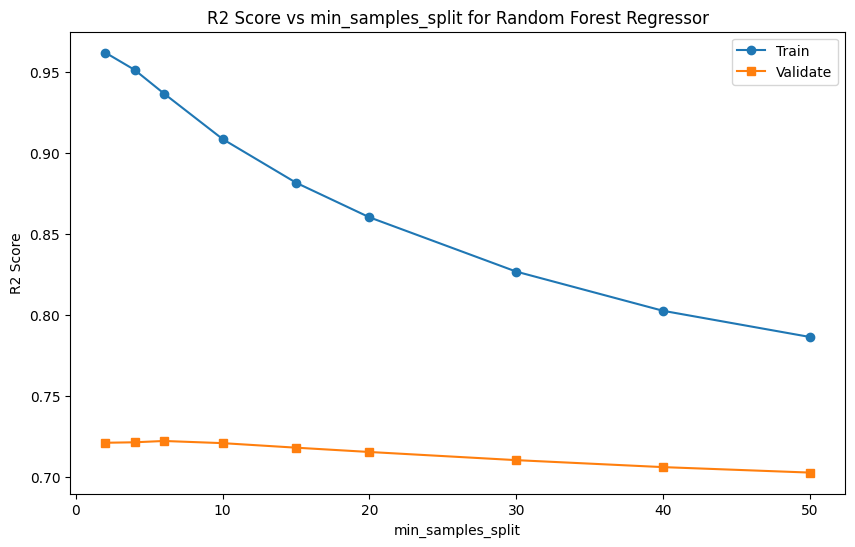

In [653]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# min_samples_split values to evaluate
min_samples_split_values = [2, 4, 6, 10, 15, 20, 30, 40, 50]
train_scores, validate_scores = [], []

# Loop over the min_samples_split values and calculate training, validation, and testing scores
for min_samples_split in min_samples_split_values:
    rf_model = RandomForestRegressor(min_samples_split=min_samples_split, n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Evaluate on the training set
    train_score = rf_model.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform cross-validation
    val_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
    validate_scores.append(np.mean(val_score))


# Plot the scores against min_samples_split values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_scores, label='Train', marker='o')
plt.plot(min_samples_split_values, validate_scores, label='Validate', marker='s')
plt.title('R2 Score vs min_samples_split for Random Forest Regressor')
plt.xlabel('min_samples_split')
plt.ylabel('R2 Score')
plt.legend()
plt.show()



In [654]:
# Initialize the Random Forest Regressor
rf_regressor5 = RandomForestRegressor(n_estimators = 50,max_depth =10, min_samples_leaf = 15,min_samples_split = 40)

# Train the model using the training data
rf_regressor5.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = rf_regressor5.predict(X_train)
y_test_pred = rf_regressor5.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.7666
Test R^2: 0.7043
Train RMSE: 16.9205
Test RMSE: 18.6238


### RFR Model 6 - Random Search

In [655]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform

# Define the parameter grid to sample from during Random Search
param_dist = {
    'max_features': ['auto', 'sqrt', 'log2', None] + list(range(1, X_train.shape[1]+1)),  # Include 'auto', 'sqrt', 'log2', None, and integer values up to the number of features
    'max_leaf_nodes': [None] + list(range(10, 1000)),  # Include None and a range of integers
    'min_weight_fraction_leaf': uniform(0, 0.5),  # Continuous distribution from 0 to 0.5
    'bootstrap': [True, False]  # Boolean values
}

# Instantiate a Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV instance to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)  # Score will be negative MSE, take the negative to get MSE


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'max_features': None, 'max_leaf_nodes': 169, 'min_weight_fraction_leaf': 0.009037681807760434}
Best Score: 362.4376139605474


In [656]:
# Initialize the Random Forest Regressor
rf_regressor_final = RandomForestRegressor(n_estimators =60, max_depth = 9 , min_samples_leaf = 15,min_samples_split = 40,
                                    bootstrap= True, max_features= None, max_leaf_nodes= 169,
                                     min_weight_fraction_leaf= 0.01,random_state = 42)

# Train the model using the training data
rf_regressor_final.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = rf_regressor_final.predict(X_train)
y_test_pred = rf_regressor_final.predict(X_test)

# Calculate the R^2 score for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

# Print the evaluation metrics
print(f"Train R^2: {train_r2:.3f}")
print(f"Test R^2: {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R^2: 0.757
Test R^2: 0.700
Train RMSE: 17.2689
Test RMSE: 18.7720


### Choosing Final Model

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Curr

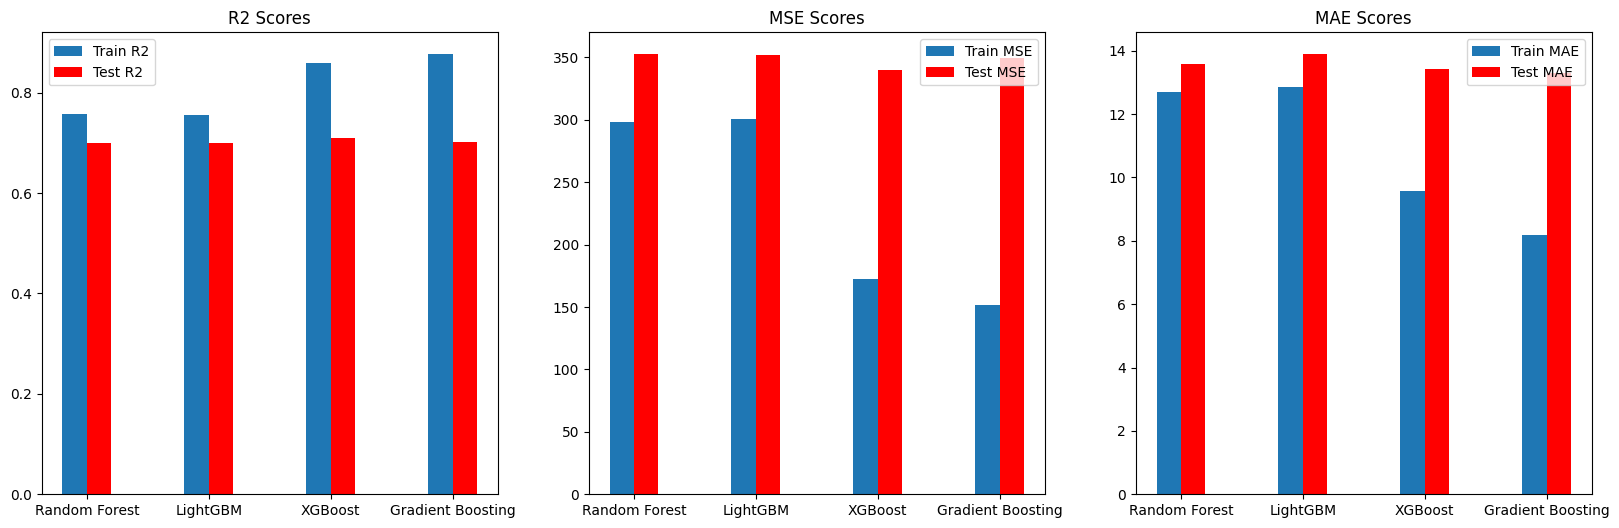

In [657]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming rf_regressor_final, lgb_regressor_final, xgb_regressor_final, gbr_model_final are already trained
# And assuming X_train, X_test, y_train, y_test are defined and contain the correct data
models = {
    'Random Forest': rf_regressor_final,
    'LightGBM': lgb_regressor_final,
    'XGBoost': xgb_regressor_final,
    'Gradient Boosting': gbr_model_final
}

# Initialize lists to store metrics
train_r2_scores = []
test_r2_scores = []
train_mse_scores = []
test_mse_scores = []
train_mae_scores = []
test_mae_scores = []

# Calculate metrics for each model
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))

    train_mse_scores.append(mean_squared_error(y_train, y_train_pred))
    test_mse_scores.append(mean_squared_error(y_test, y_test_pred))

    train_mae_scores.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_scores.append(mean_absolute_error(y_test, y_test_pred))

bar_width = 0.2
index = np.arange(len(models))

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Train R2 Scores
ax[0].bar(index, train_r2_scores, bar_width, label='Train R2')
# Test R2 Scores
ax[0].bar(index + bar_width, test_r2_scores, bar_width, label='Test R2', color='r')
ax[0].set_title('R2 Scores')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(models.keys())
ax[0].legend()

# Train MSE Scores
ax[1].bar(index, train_mse_scores, bar_width, label='Train MSE')
# Test MSE Scores
ax[1].bar(index + bar_width, test_mse_scores, bar_width, label='Test MSE', color='r')
ax[1].set_title('MSE Scores')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(models.keys())
ax[1].legend()

# Train MAE Scores
ax[2].bar(index, train_mae_scores, bar_width, label='Train MAE')
# Test MAE Scores
ax[2].bar(index + bar_width, test_mae_scores, bar_width, label='Test MAE', color='r')
ax[2].set_title('MAE Scores')
ax[2].set_xticks(index + bar_width / 2)
ax[2].set_xticklabels(models.keys())
ax[2].legend()

# Show the plot